# **WOW Project**

Yangling Li

Yilin Yang

# BLUF

● This dataset has over 54,000 samples with no missing value and 303 duplicates (we dropped these dups). RFE results show that based on a random forest regressor, the top 5 features are cap-diameter, gill-attachment, gill-color, stem-height and stem-weight.

● 3 prediction models are constructed: Random Forest, XGBoost and Pycaret to give a holistic view among different models. The metrics are MSE, accuracy and recall.

● The best model is Random Forest, with the lowest MSE of 0.0096. Accuracy and recall both exceed 99%. In Pycaret, the dummy classifier provides the highest recall of 100%.

● We tuned the random forest model with hyperparameter optimization and SMOTE. The deltas are both negative with values less than -0.001, too small to be significant. Learning curve of training score = 100%, cross-validation score near 99%.

● Finally, we applied the H2O toolkit to examine the RAI. PDP shows quite even results among samples, yet ICE plots can be relatively messy. This might be because in a large scale of sample size, each parameter would have disparate responses among samples.

● A surrogate model of decision tree is built. It has 4 layers with accuracy = 66%.

# Data

## Data Source

The dataset we selected is a *Mushroom Dataset for Binary Classification* with 9 columns and over 54,000 data entries. The original source of the dataset is from UCI Library, and the version we downloaded is a simplified version available on Kaggle. The link is https://www.kaggle.com/datasets/prishasawhney/mushroom-dataset/data.

## Data Dictionary

This dataset was already cleaned using various techniques such as Modal imputation, one-hot encoding, z-score normalization, and feature selection. It contains 9 columns:

*   Cap Diameter
*   Cap Shape
*   Gill Attachment
*   Gill Color
*   Stem Height
*   Stem Width
*   Stem Color
*   Season
*   **Target Class - Is it edible or not?**

The Target Class contains two values - 0 or 1 - where 0 refers to edible and 1 refers to poisonous. There are 24,360 instances belonging to class 0 and 29,675 belonging to class 1.

## Data Frame

In [ ]:
# load data
from google.colab import files
import pandas as pd

df = pd.read_csv("/content/sample_data/mushroom_data.csv")

df

cap-diameter  cap-shape  gill-attachment  gill-color  stem-height  \
0              1372          2                2          10     3.807467   
1              1461          2                2          10     3.807467   
2              1371          2                2          10     3.612496   
3              1261          6                2          10     3.787572   
4              1305          6                2          10     3.711971   
...             ...        ...              ...         ...          ...   
54030            73          5                3           2     0.887740   
54031            82          2                3           2     1.186164   
54032            82          5                3           2     0.915593   
54033            79          2                3           2     1.034963   
54034            72          5                3           2     1.158311   

       stem-width  stem-color    season  class  
0            1545          11  1.804273      1  
1            1557          11  1.804273      1  
2            1566          11  1.804273      1  
3            1566          11  1.804273      1  
4            1464          11  0.943195      1  
...           ...         ...       ...    ...  
54030         569          12  0.943195      1  
54031         490          12  0.943195      1  
54032         584          12  0.888450      1  
54033         491          12  0.888450      1  
54034         492          12  0.888450      1  

[54035 rows x 9 columns]

# EDA

## Check Missing Values & Duplicates

In [ ]:
# Checking the number of missing values in each column
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

# Checking if there are any missing values in the DataFrame
total_missing = df.isnull().any().any()
print("\nAre there any missing values in the DataFrame? ", total_missing)

Missing values in each column:
cap-diameter       0
cap-shape          0
gill-attachment    0
gill-color         0
stem-height        0
stem-width         0
stem-color         0
season             0
class              0
dtype: int64

Are there any missing values in the DataFrame?  False


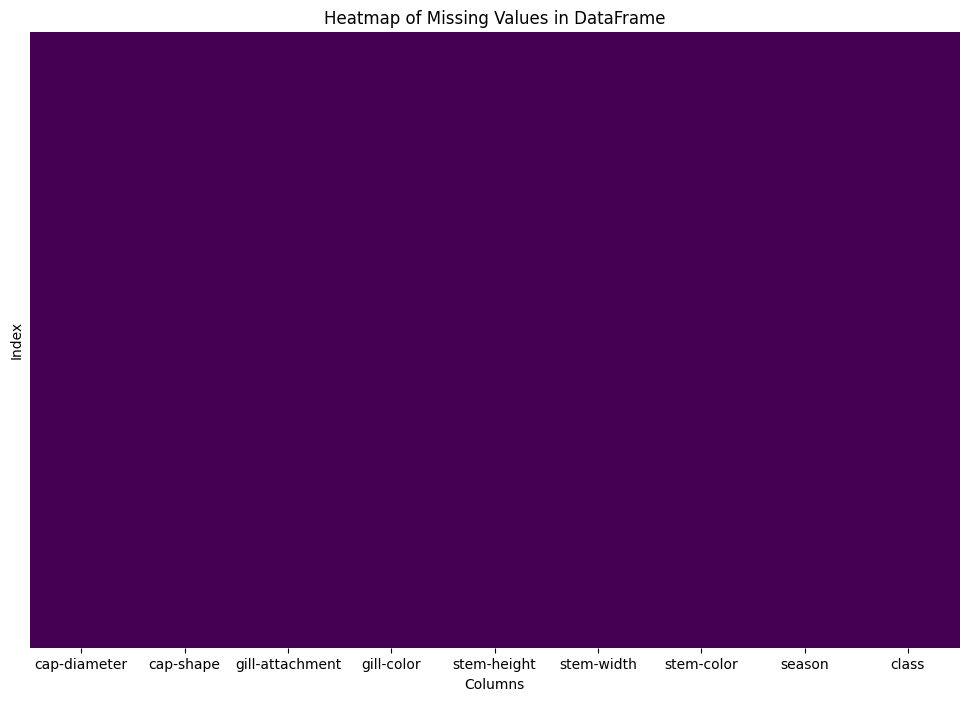

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame indicating where values are missing
missing_data = df.isnull()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))  # Adjust the size as needed

# Draw the heatmap with 'True' showing where values are missing
sns.heatmap(missing_data, cbar=False, cmap='viridis', yticklabels=False)

# Add title and labels as necessary
plt.title('Heatmap of Missing Values in DataFrame')
plt.xlabel('Columns')
plt.ylabel('Index')

# Show the plot
plt.show()

In [ ]:
# Checking for duplicate rows
duplicate_rows = df.duplicated().sum()
print("Number of duplicate rows:", duplicate_rows)

# Optional: Display the duplicate rows
if duplicate_rows > 0:
    print("\nDuplicate Rows:")
    display(df[df.duplicated(keep=False)])  # 'keep=False' marks all duplicates as True

# Dropping duplicates
df = df.drop_duplicates()

Number of duplicate rows: 303

Duplicate Rows:


cap-diameter  cap-shape  gill-attachment  gill-color  stem-height  \
8622             69          6                0          10     1.206059   
8815             69          6                0          10     1.206059   
11664            27          6                0          11     1.054858   
11930            27          6                0          11     1.054858   
33439           204          0                0           5     0.154755   
...             ...        ...              ...         ...          ...   
52001           249          3                3           2     2.013794   
52003           285          3                3           2     2.013794   
52005           268          3                3           2     2.013794   
52006           238          3                3           2     2.013794   
52008           273          3                3           2     2.013794   

       stem-width  stem-color    season  class  
8622          125           1  0.888450      1  
8815          125           1  0.888450      1  
11664          24          12  0.888450      1  
11930          24          12  0.888450      1  
33439         271           6  0.027372      1  
...           ...         ...       ...    ...  
52001           0           2  0.888450      1  
52003           0           2  0.888450      1  
52005           0           2  1.804273      1  
52006           0           2  0.888450      1  
52008           0           2  0.943195      1  

[528 rows x 9 columns]

## Skewness

In [ ]:
# Calculate skewness for each numerical column
skewness = df.skew()
print("Skewness of each numerical column:")
print(skewness)

Skewness of each numerical column:
cap-diameter       0.774528
cap-shape         -0.541467
gill-attachment    0.590020
gill-color        -0.493716
stem-height        1.495760
stem-width         0.813577
stem-color        -0.641546
season             0.567115
class             -0.187378
dtype: float64


Based on the histogram of each variable, we can see skewness is high for "stem height" and "stem width" in particular. Other parameters also yields relatively high skewness (greater than 0.5/-0.5) in general, thus we want to address this issue later by comparing models with and without scaling.

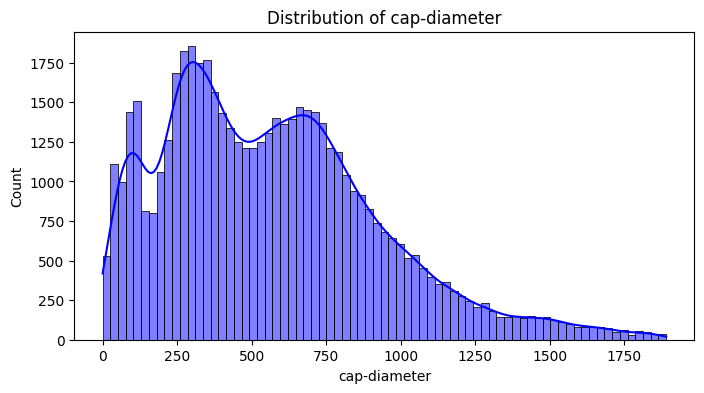

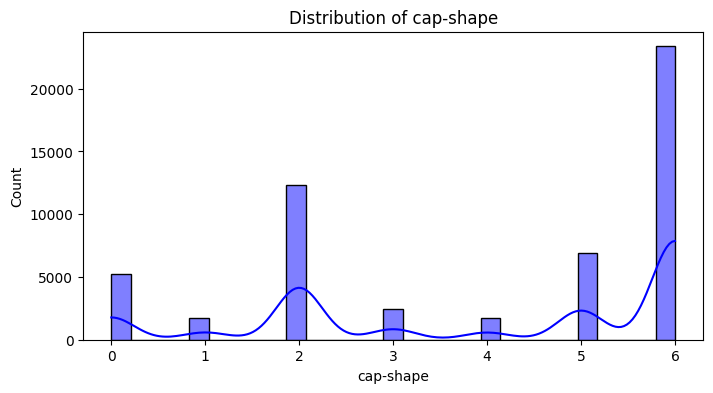

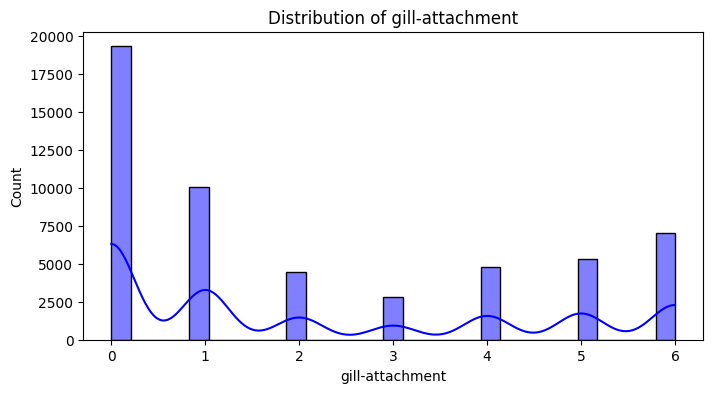

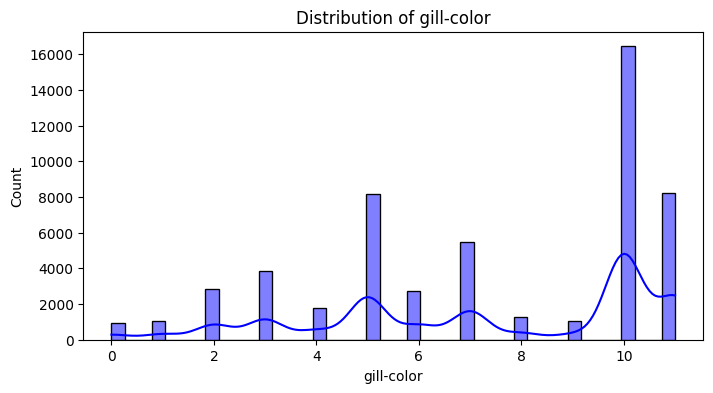

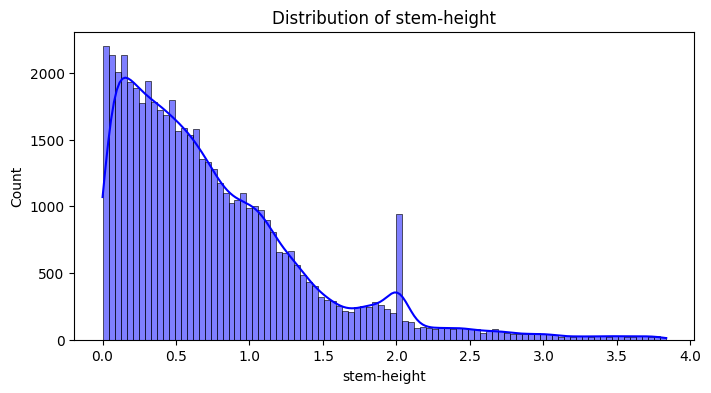

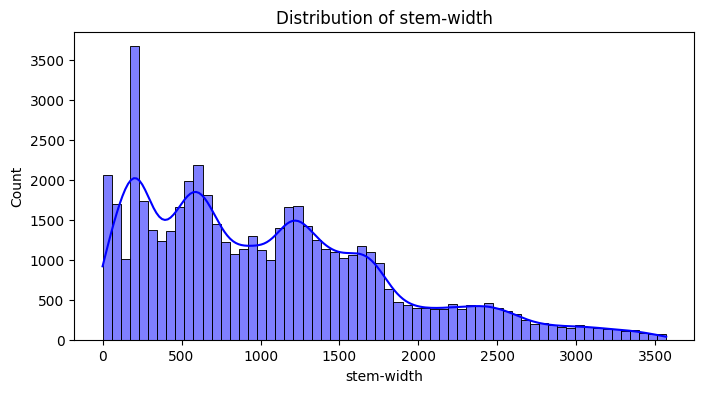

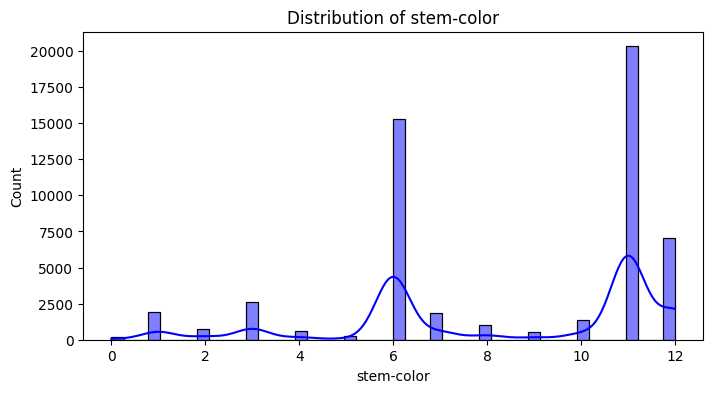

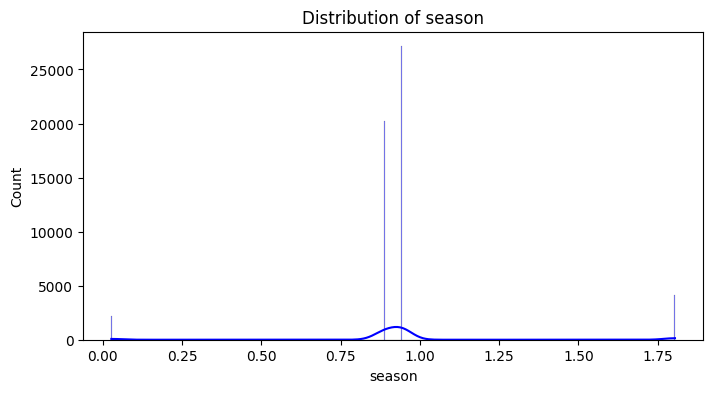

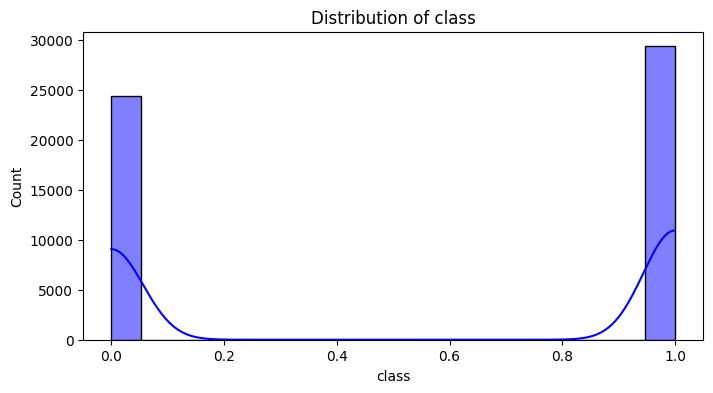

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms to visualize skewness
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[column], kde=True, color='blue')
    plt.title(f'Distribution of {column}')
    plt.show()

## Descriptive Stats

In [ ]:
# Unique values and counts
for column in df.columns:
    print(f"Unique values in {column}:")
    print(df[column].value_counts())
    print("\n")  # Adds a new line for better readability between columns

Unique values in cap-diameter:
cap-diameter
269     90
273     89
104     88
242     85
106     83
        ..
1694     1
1826     1
1766     1
1865     1
1885     1
Name: count, Length: 1847, dtype: int64


Unique values in cap-shape:
cap-shape
6    23375
2    12294
5     6889
0     5272
3     2480
1     1722
4     1700
Name: count, dtype: int64


Unique values in gill-attachment:
gill-attachment
0    19304
1    10026
6     7001
5     5292
4     4795
2     4474
3     2840
Name: count, dtype: int64


Unique values in gill-color:
gill-color
10    16432
11     8213
5      8153
7      5455
3      3847
2      2840
6      2714
4      1772
8      1271
1      1059
9      1023
0       953
Name: count, dtype: int64


Unique values in stem-height:
stem-height
2.013794    759
0.366493    140
0.052153    135
0.095921    131
0.068069    130
           ... 
3.628412      1
3.345904      1
3.520980      1
3.349883      1
2.757014      1
Name: count, Length: 1455, dtype: int64


Unique values in stem-w

In [ ]:
# Define categorical and numerical vars
categorical = ["cap-shape", "gill-attachment", "gill-color", "stem-color", "season", "class"]
numerical = ["cap-diameter", "stem-height", "stem-width"]

In [ ]:
# Get descriptive statistics for numerical columns

# Subset the DataFrame to include only the specified numerical columns
numerical_data = df[numerical]

# Get descriptive statistics for these columns
descriptive_stats_numerical = numerical_data.describe()
print(descriptive_stats_numerical)

       cap-diameter   stem-height    stem-width
count  53732.000000  53732.000000  53732.000000
mean     568.629178      0.752102   1057.000633
std      360.384461      0.645987    780.263033
min        0.000000      0.000426      0.000000
25%      290.000000      0.270146    430.000000
50%      528.000000      0.589316    929.000000
75%      782.000000      1.046900   1527.000000
max     1891.000000      3.835320   3569.000000


In [ ]:
# Convert each column to a categorical type
for column in categorical:
    df[column] = df[column].astype('category')

# Get descriptive statistics for categorical columns

# Subset the DataFrame to include only the specified categorical columns
categorical_data = df[categorical]

# Get descriptive statistics for these categorical columns
descriptive_stats_categorical = categorical_data.describe()
print(descriptive_stats_categorical)

        cap-shape  gill-attachment  gill-color  stem-color        season  \
count       53732            53732       53732       53732  53732.000000   
unique          7                7          12          13      4.000000   
top             6                0          10          11      0.943195   
freq        23375            19304       16432       20317  27133.000000   

        class  
count   53732  
unique      2  
top         1  
freq    29372  



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

## Pair Plot

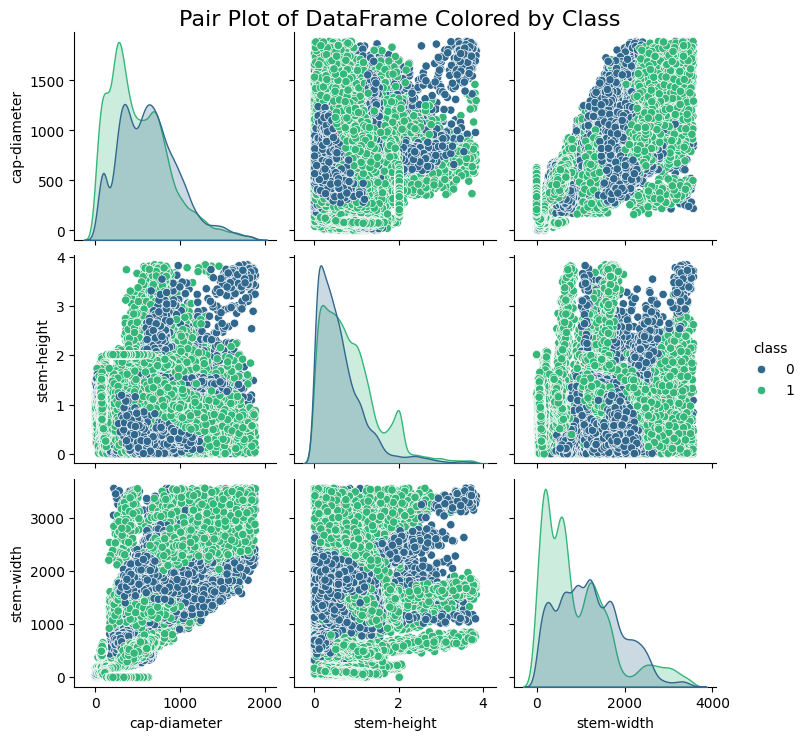

In [ ]:
# Create a pair plot colored by values in the "class" column
pair_plot = sns.pairplot(df, hue='class', palette='viridis', diag_kind='kde')

# Adding a title (requires matplotlib 3.2.2 or later)
plt.subplots_adjust(top=0.95)
pair_plot.fig.suptitle('Pair Plot of DataFrame Colored by Class', fontsize=16)

# Show the plot
plt.show()

## Correlation

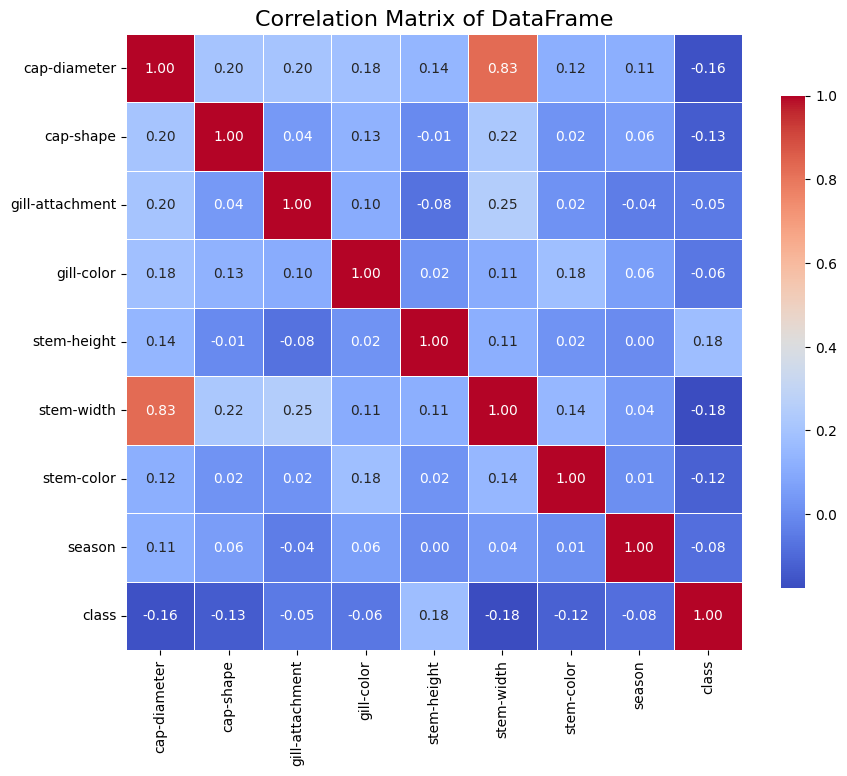

In [ ]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))  # You can adjust the size as needed

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            cbar_kws={'shrink': .8}, square=True, linewidths=.5)

# Adding title and labels as necessary
plt.title('Correlation Matrix of DataFrame', fontsize=16)

# Show the plot
plt.show()

From the correlation matrix above, we can see parameters "steam width" and "cap diameter" has the strongest correlation (0.83) among all. Thus, we draw a scatter plot for these two variables below, seperating by target class.

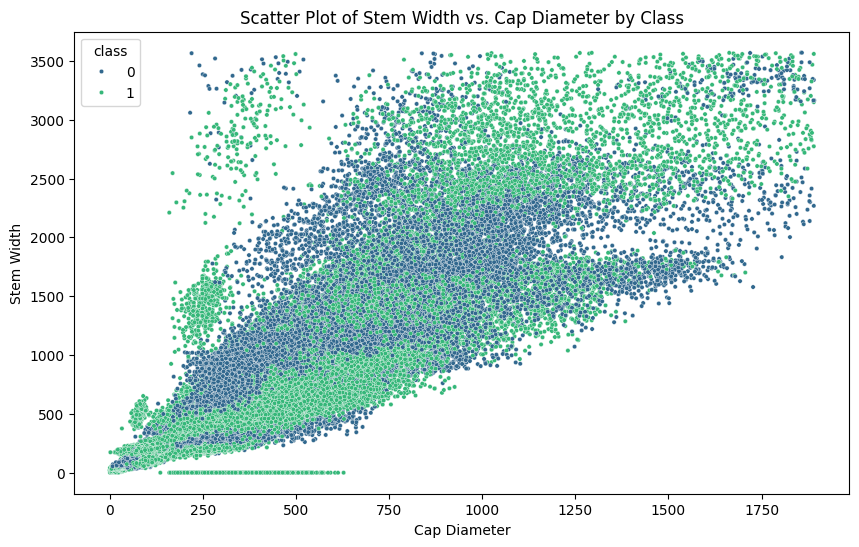

In [ ]:
# Create the scatter plot with color differentiation by 'class'
plt.figure(figsize=(10, 6))  # Set the figure size
sns.scatterplot(data=df, x='cap-diameter', y='stem-width',
                hue='class', palette='viridis', s=10)  # s is the size of the points

# Adding labels and title
plt.xlabel('Cap Diameter')
plt.ylabel('Stem Width')
plt.title('Scatter Plot of Stem Width vs. Cap Diameter by Class')

# Show the plot
plt.show()

# Feature Engineering

## RFE - Random Forest

In [ ]:
import numpy as np
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Encoding the target variable if it's categorical
le = LabelEncoder()
y = le.fit_transform(df['class'])

# Prepare the feature set
X = df.drop('class', axis=1)  # Drop the target column to isolate features

# Initialize the classifier
model = RandomForestClassifier(random_state=42)  # Using random state for reproducibility

# Initialize RFE with the chosen model, specifying the number of features you want to select
rfe = RFE(estimator=model, n_features_to_select=5)  # Adjust the number of features as 5

# Fit RFE on the feature set and the target
rfe.fit(X, y)

# Get the names of selected features
selected_features = X.columns[rfe.support_]

# Print the selected features and their rankings
print("Selected features:", selected_features)

Selected features: Index(['cap-diameter', 'gill-attachment', 'gill-color', 'stem-height',
       'stem-width'],
      dtype='object')


From the RFE based on a random forest regressor, the top 5 features to include in the model are:

*   cap-diameter
*   gill-attachment
*   gill-color
*   stem-height
*   stem-width



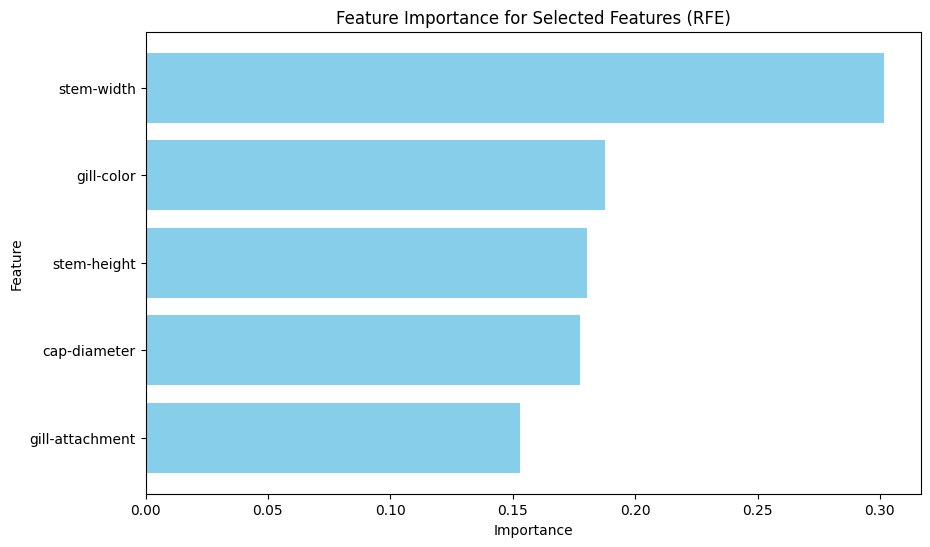

In [ ]:
# Get feature importance from the estimator inside RFE
feature_importance = model.fit(X[selected_features], y).feature_importances_

# Create a DataFrame to store selected features and their importances
selected_features_df = pd.DataFrame({
    'Feature': selected_features,
    'Importance': feature_importance
})

# Sort by importance
selected_features_df.sort_values(by='Importance', ascending=False, inplace=True)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(selected_features_df['Feature'], selected_features_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Selected Features (RFE)')
plt.gca().invert_yaxis()
plt.show()

Based on the plot above, we can see stem width stands out significantly as the most important feature in the dataset, while other features ranges in between 0.15-0.20 in importance.

## Encoding & Scaling

Since the original dataset is already processed by techniques such as one-hot encoding and z-score normalization, we first check for data types here for columns in the dataframe, and then conduct dummy encoding to categorical variables.

In [ ]:
# Check the data types
print(df.dtypes)

cap-diameter          int64
cap-shape          category
gill-attachment    category
gill-color         category
stem-height         float64
stem-width            int64
stem-color         category
season             category
class              category
dtype: object


Dummy encoding for categorical variables *gill attachement, gill color* and *season* considering feature importance and number of new added columns.

In [ ]:
import pandas as pd

# Selecting categorical columns except 'class'
categorical_columns = ["gill-attachment", "gill-color", "season"]
# Create dummy variables, dropping the first to avoid the dummy variable trap
dummies = pd.get_dummies(df[categorical_columns], drop_first=True).astype(int)

# Concatenate the dummy variables with the original DataFrame
# Drop the original categorical columns
df_encoded = pd.concat([df.drop(categorical_columns, axis=1), dummies], axis=1)

df_encoded

cap-diameter cap-shape  stem-height  stem-width stem-color class  \
0              1372         2     3.807467        1545         11     1   
1              1461         2     3.807467        1557         11     1   
2              1371         2     3.612496        1566         11     1   
3              1261         6     3.787572        1566         11     1   
4              1305         6     3.711971        1464         11     1   
...             ...       ...          ...         ...        ...   ...   
54030            73         5     0.887740         569         12     1   
54031            82         2     1.186164         490         12     1   
54032            82         5     0.915593         584         12     1   
54033            79         2     1.034963         491         12     1   
54034            72         5     1.158311         492         12     1   

       gill-attachment_1  gill-attachment_2  gill-attachment_3  \
0                      0                  1                  0   
1                      0                  1                  0   
2                      0                  1                  0   
3                      0                  1                  0   
4                      0                  1                  0   
...                  ...                ...                ...   
54030                  0                  0                  1   
54031                  0                  0                  1   
54032                  0                  0                  1   
54033                  0                  0                  1   
54034                  0                  0                  1   

       gill-attachment_4  ...  gill-color_5  gill-color_6  gill-color_7  \
0                      0  ...             0             0             0   
1                      0  ...             0             0             0   
2                      0  ...             0             0             0   
3                      0  ...             0             0             0   
4                      0  ...             0             0             0   
...                  ...  ...           ...           ...           ...   
54030                  0  ...             0             0             0   
54031                  0  ...             0             0             0   
54032                  0  ...             0             0             0   
54033                  0  ...             0             0             0   
54034                  0  ...             0             0             0   

       gill-color_8  gill-color_9  gill-color_10  gill-color_11  \
0                 0             0              1              0   
1                 0             0              1              0   
2                 0             0              1              0   
3                 0             0              1              0   
4                 0             0              1              0   
...             ...           ...            ...            ...   
54030             0             0              0              0   
54031             0             0              0              0   
54032             0             0              0              0   
54033             0             0              0              0   
54034             0             0              0              0   

       season_0.8884502877862838  season_0.9431945538974952  \
0                              0                          0   
1                              0                          0   
2                              0                          0   
3                              0                          0   
4                              0                          1   
...                          ...                        ...   
54030                          0                          1   
54031                          0                          1   
54032                          1        

## Balancing

<ipython-input-18-028984b741c9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class', data=df_encoded, palette='viridis')


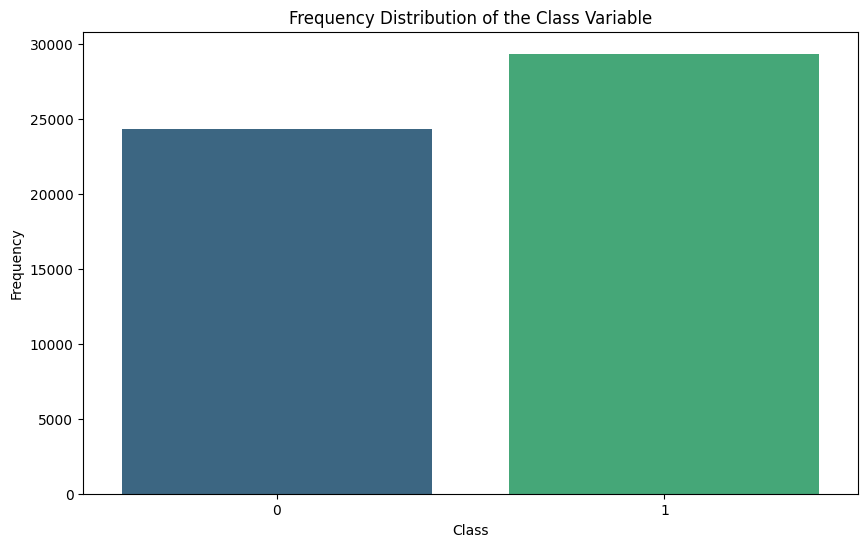

In [ ]:
# Create a countplot to show the distribution of the 'class' variable
plt.figure(figsize=(10, 6))  # You can adjust the size of the figure to fit your needs
sns.countplot(x='class', data=df_encoded, palette='viridis')
plt.title('Frequency Distribution of the Class Variable')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

In [ ]:
df_encoded['class'].value_counts()

1    29372
0    24360
Name: class, dtype: int64

In [ ]:
print(f"Percentage of edible mushrooms in the dataset: {round(24360/(29372+24360)*100)} %")
print(f"Percentage of poisonous mushrooms in the dataset: {round(29372/(29372+24360)*100)} %")

Percentage of edible mushrooms in the dataset: 45 %
Percentage of poisonous mushrooms in the dataset: 55 %


From the bar plot abaove, we can see the distribution of data based on the "class" variable (target variable) is quite even. There are around 45% of mushrooms in the cleaned dataset identified as edible and 55% as poisonous. Thus no further balancing is needed.

## Hold-out Sample


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_df, test_df = train_test_split(df_encoded, test_size=0.4, random_state=42)  # Adjust test_size

# Optional: Check the size of each dataset
print("Training set size:", len(train_df))
print("Testing set size:", len(test_df))

Training set size: 32239
Testing set size: 21493


# Prediction Models

## Random Forest

Mean Squared Error (RF): 0.009584515888894059
Accuracy (RF): 0.9904154841111059
Recall (RF): 0.9904154841111059


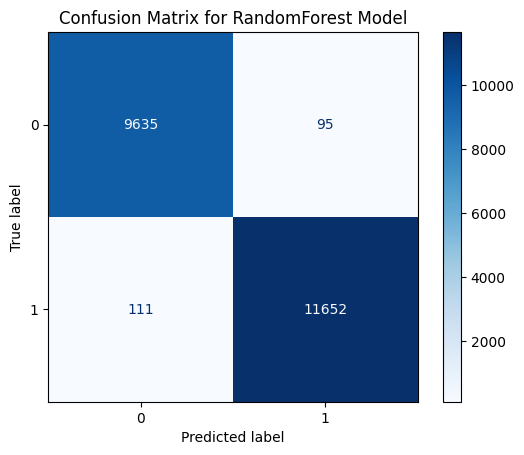

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Separate features and target
X_train = train_df.drop('class', axis=1)
y_train = train_df['class']
X_test = test_df.drop('class', axis=1)
y_test = test_df['class']

# Encode target variables
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# Identify categorical and numerical columns
categorical_features = X_train.select_dtypes(include=['category', 'object']).columns.tolist()
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Build a pipeline with the preprocessor and the RandomForest model
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Train the model using the pipeline
rf_pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_pipeline.predict(X_test)

# Calculate evaluation metrics
mse_rf = mean_squared_error(y_test, y_pred_rf)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')  # Adjust 'average' based on problem type

print(f"Mean Squared Error (RF): {mse_rf}")
print(f"Accuracy (RF): {accuracy_rf}")
print(f"Recall (RF): {recall_rf}")

# Confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=le.classes_)

# Plot the confusion matrix
disp_rf.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for RandomForest Model")
plt.show()


## XG Boost

Mean Squared Error: 0.012096961801516773
Accuracy: 0.9879030381984832
Recall: 0.9879030381984832


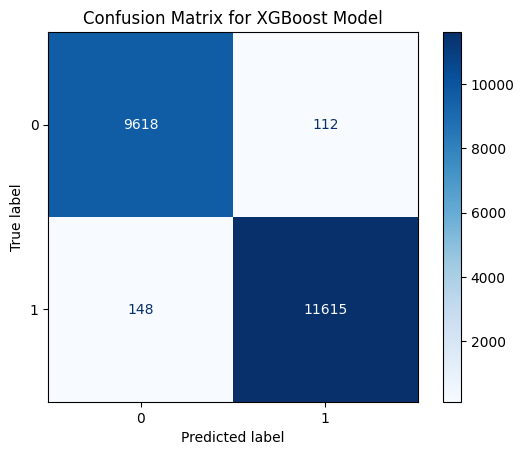

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
import xgboost as xgb
import matplotlib.pyplot as plt

# Separate features and target
X_train = train_df.drop('class', axis=1)
y_train = train_df['class']
X_test = test_df.drop('class', axis=1)
y_test = test_df['class']

# Encode target variables
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# Identify categorical and numerical columns
categorical_features = X_train.select_dtypes(include=['category', 'object']).columns.tolist()
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Build a pipeline with the preprocessor and the XGBoost model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', xgb.XGBClassifier(random_state=42))
])

# Train the model using the pipeline
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')  # Adjust 'average' based on problem type

print(f"Mean Squared Error: {mse}")
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)

# Plot the confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for XGBoost Model")
plt.show()



## PyCaret

In [ ]:
pip install pycaret

In [ ]:
from pycaret.classification import *

# Setup the environment
clf = setup(data=train_df, target='class', session_id=123,
            categorical_features=["cap-shape", "gill-attachment", "gill-color", "stem-color", "season"],
            numeric_features=["cap-diameter", "stem-height", "stem-width"],
            preprocess=True)

best_model = compare_models()

# Creating and tuning a Random Forest model
rf = create_model('rf')
tuned_rf = tune_model(rf)

evaluate_model(tuned_rf)

predictions = predict_model(tuned_rf, data=test_df)

final_model = finalize_model(tuned_rf)

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Based on model accuracy, random forest classifier, xg boost and light GBM all perform outstandingly (with accuracy higher than 97%) comparing with other models.

# Model Tuning

## Delta 1 - Hyperparameter Optimization

As random forest classifier seems to perform the best among other models, we further investigate whether applying hyperparameter optimization would further improve the random forest model.

Mean Squared Error (RF): 0.009584515888894059
Accuracy (RF): 0.9904154841111059
Recall (RF): 0.9904154841111059


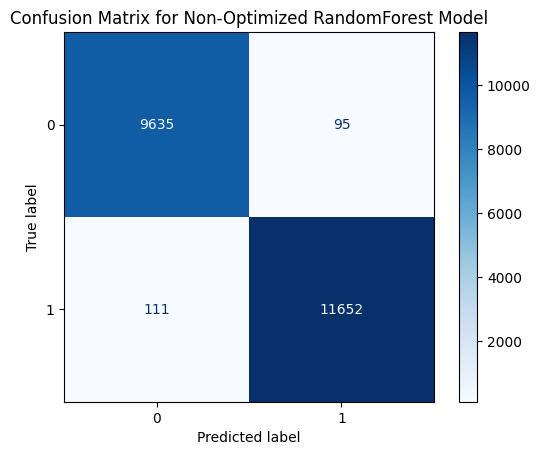


Mean Squared Error (Optimized RF): 0.009770622993532778
Accuracy (Optimized RF): 0.9902293770064672
Recall (Optimized RF): 0.9902293770064672


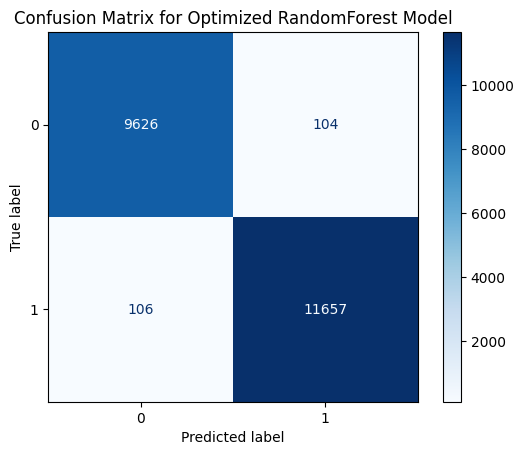


Delta in Accuracy between Optimized and Non-Optimized Models: -0.00018610710463873303


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Separate features and target
X_train = train_df.drop('class', axis=1)
y_train = train_df['class']
X_test = test_df.drop('class', axis=1)
y_test = test_df['class']

# Encode target variables
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# Identify categorical and numerical columns
categorical_features = X_train.select_dtypes(include=['category', 'object']).columns.tolist()
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Build a pipeline with the preprocessor and the RandomForest model
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Train the model without hyperparameter tuning
rf_pipeline.fit(X_train, y_train)

# Predict on the test set (non-optimized)
y_pred_rf = rf_pipeline.predict(X_test)

# Calculate evaluation metrics (non-optimized)
mse_rf = mean_squared_error(y_test, y_pred_rf)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')  # Adjust 'average' based on problem type

print(f"Mean Squared Error (RF): {mse_rf}")
print(f"Accuracy (RF): {accuracy_rf}")
print(f"Recall (RF): {recall_rf}")

# Confusion matrix (non-optimized)
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=le.classes_)

# Plot the confusion matrix (non-optimized)
disp_rf.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Non-Optimized RandomForest Model")
plt.show()

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [10, 20, None],
    'classifier__min_samples_split': [2, 10, 20],
    'classifier__min_samples_leaf': [1, 5, 10]
}

# GridSearchCV object
grid_search = GridSearchCV(rf_pipeline, param_grid, cv=3, scoring='accuracy', n_jobs=-1)

# Train the model using GridSearchCV
grid_search.fit(X_train, y_train)

# Predict on the test set (optimized)
y_pred_rf_optimized = grid_search.predict(X_test)

# Calculate evaluation metrics (optimized)
mse_rf_optimized = mean_squared_error(y_test, y_pred_rf_optimized)
accuracy_rf_optimized = accuracy_score(y_test, y_pred_rf_optimized)
recall_rf_optimized = recall_score(y_test, y_pred_rf_optimized, average='weighted')

print(f"\nMean Squared Error (Optimized RF): {mse_rf_optimized}")
print(f"Accuracy (Optimized RF): {accuracy_rf_optimized}")
print(f"Recall (Optimized RF): {recall_rf_optimized}")

# Confusion matrix (optimized)
cm_rf_optimized = confusion_matrix(y_test, y_pred_rf_optimized)
disp_rf_optimized = ConfusionMatrixDisplay(confusion_matrix=cm_rf_optimized, display_labels=le.classes_)

# Plot the confusion matrix (optimized)
disp_rf_optimized.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Optimized RandomForest Model")
plt.show()

# Compare the delta in accuracy
delta_accuracy = accuracy_rf_optimized - accuracy_rf
print(f"\nDelta in Accuracy between Optimized and Non-Optimized Models: {delta_accuracy}")


As delta in accuracy is neglectable, we believe in this case hyperparameter optimization doesn't in fact improve model performance. In addition, the non-optimized model already yields a very high accuracy. But hyperparameter optimization does help to reduce the number of FN (111 vs. 106), which is a sign we prefer.

## Delta 2 - SMOTE

Also, we want to expolore the effect on model performance by adopting SMOTE to the dataset.


Mean Squared Error (RF without SMOTE): 0.009584515888894059
Accuracy (RF without SMOTE): 0.9904154841111059
Recall (RF without SMOTE): 0.9904154841111059


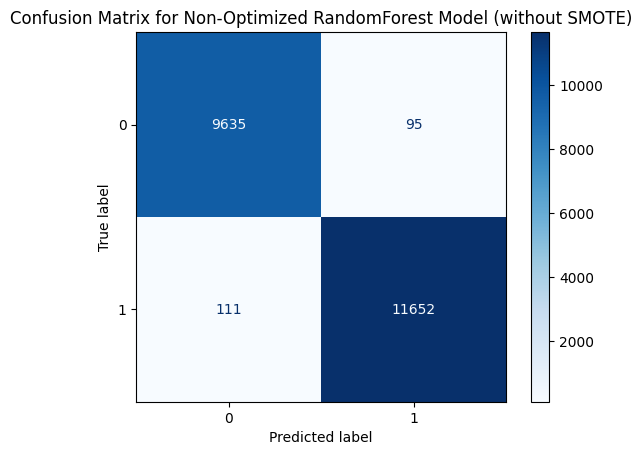

Mean Squared Error (RF with SMOTE): 0.010142837202810217
Accuracy (RF with SMOTE): 0.9898571627971898
Recall (RF with SMOTE): 0.9898571627971898


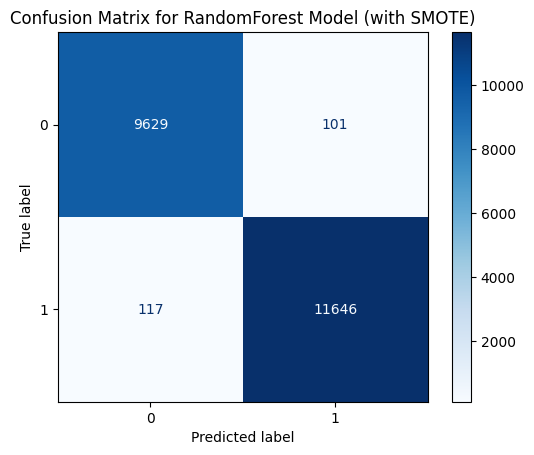


Delta in Accuracy between Models with and without SMOTE: -0.0005583213139160881


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, mean_squared_error, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Separate features and target
X_train = train_df.drop('class', axis=1)
y_train = train_df['class']
X_test = test_df.drop('class', axis=1)
y_test = test_df['class']

# Encode target variables
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# Identify categorical and numerical columns
categorical_features = X_train.select_dtypes(include=['category', 'object']).columns.tolist()
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Compare with non-optimized model (without SMOTE)
# Train the non-optimized RandomForest model (without SMOTE)
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Train the non-optimized pipeline model
rf_pipeline.fit(X_train, y_train)

# Predict without SMOTE
y_pred_rf_no_smote = rf_pipeline.predict(X_test)

# Calculate evaluation metrics (without SMOTE)
mse_rf_no_smote = mean_squared_error(y_test, y_pred_rf_no_smote)
accuracy_rf_no_smote = accuracy_score(y_test, y_pred_rf_no_smote)
recall_rf_no_smote = recall_score(y_test, y_pred_rf_no_smote, average='weighted')

print(f"\nMean Squared Error (RF without SMOTE): {mse_rf_no_smote}")
print(f"Accuracy (RF without SMOTE): {accuracy_rf_no_smote}")
print(f"Recall (RF without SMOTE): {recall_rf_no_smote}")

# Confusion matrix (without SMOTE)
cm_rf_no_smote = confusion_matrix(y_test, y_pred_rf_no_smote)
disp_rf_no_smote = ConfusionMatrixDisplay(confusion_matrix=cm_rf_no_smote, display_labels=le.classes_)

# Plot the confusion matrix (without SMOTE)
disp_rf_no_smote.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Non-Optimized RandomForest Model (without SMOTE)")
plt.show()

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply preprocessing
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Apply SMOTE to training data
X_train_smote, y_train_smote = smote.fit_resample(X_train_processed, y_train)

# Initialize non-optimized RandomForest model
rf = RandomForestClassifier(random_state=42)

# Train the model on SMOTE-augmented data
rf.fit(X_train_smote, y_train_smote)

# Predict on the test set
y_pred_rf_smote = rf.predict(X_test_processed)

# Calculate evaluation metrics (with SMOTE)
mse_rf_smote = mean_squared_error(y_test, y_pred_rf_smote)
accuracy_rf_smote = accuracy_score(y_test, y_pred_rf_smote)
recall_rf_smote = recall_score(y_test, y_pred_rf_smote, average='weighted')  # Adjust 'average' based on problem type

print(f"Mean Squared Error (RF with SMOTE): {mse_rf_smote}")
print(f"Accuracy (RF with SMOTE): {accuracy_rf_smote}")
print(f"Recall (RF with SMOTE): {recall_rf_smote}")

# Confusion matrix (with SMOTE)
cm_rf_smote = confusion_matrix(y_test, y_pred_rf_smote)
disp_rf_smote = ConfusionMatrixDisplay(confusion_matrix=cm_rf_smote, display_labels=le.classes_)

# Plot the confusion matrix (with SMOTE)
disp_rf_smote.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for RandomForest Model (with SMOTE)")
plt.show()

# Calculate delta in accuracy
delta_accuracy_smote = accuracy_rf_smote - accuracy_rf_no_smote
print(f"\nDelta in Accuracy between Models with and without SMOTE: {delta_accuracy_smote}")

Similarly, SMOTE doesn't improve the original random forest model in terms of accuracy.

## Overfitting

From above comparisons, we found the random forest classifier is the best model to predict whether a mushroom is edible or not based on given features in the dataset. To see if our model has overfitting issues, we plot the model's learning curve down below.

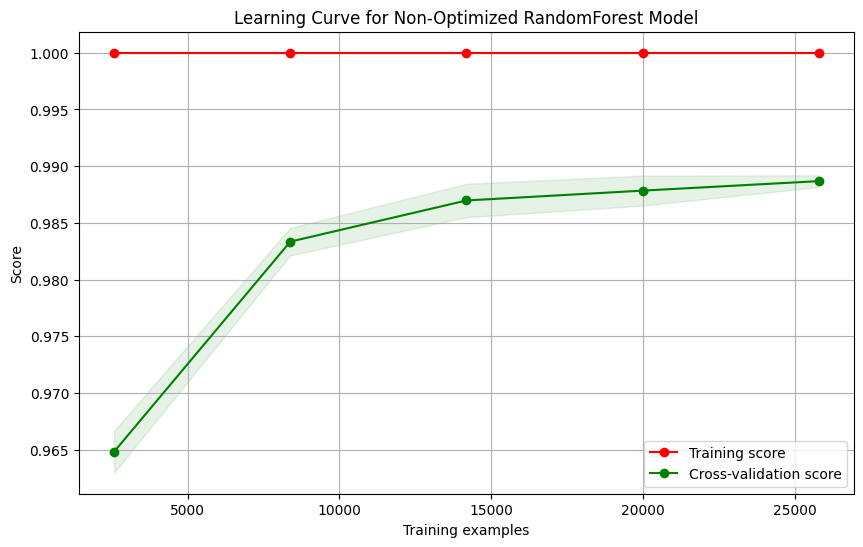

In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Function to plot the learning curve
def plot_learning_curve(estimator, title, X, y, cv=None, n_jobs=None, train_sizes=np.linspace(0.1, 1.0, 5)):
    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='accuracy'
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")

    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()

# Create the preprocessor and RandomForest pipeline again (non-optimized model)
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Plot learning curve
plot_learning_curve(
    rf_pipeline,
    title="Learning Curve for Non-Optimized RandomForest Model",
    X=X_train,
    y=y_train,
    cv=5,
    n_jobs=-1
)

# RAI

## H2O Toolkit - Random Forest

In [ ]:
pip install h2o

Checking whether there is an H2O instance running at http://localhost:54321. connected.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         1 min 25 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.46.0.1
H2O_cluster_version_age:    1 month and 24 days
H2O_cluster_name:           H2O_from_python_unknownUser_7p1vsd
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.170 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.10.12 final
--------------------------  -----------------------------------------------------------------------------------------

Training set size: 32239
Testing set size: 21493
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()



Mean Squared Error (H2O RF): 0.0094914623365747
Accuracy (H2O RF): 0.9905085376634253
Recall (H2O RF): 0.9905085376634253


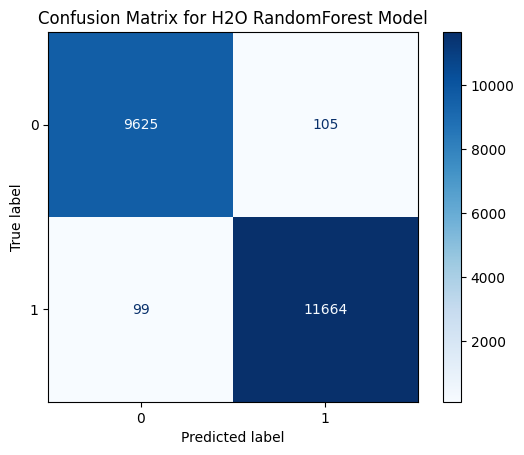

H2O session _sid_8cda closed.


Deprecated, use ``h2o.cluster().shutdown()``.


In [ ]:
import h2o
from h2o.estimators import H2ORandomForestEstimator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, recall_score, mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd

# Initialize the H2O cluster
h2o.init()

# Assuming `df_encoded` contains your data and the target variable is 'class'
# Split the data into training and testing sets
train_df, test_df = train_test_split(df_encoded, test_size=0.4, random_state=42)

# Optional: Check the size of each dataset
print("Training set size:", len(train_df))
print("Testing set size:", len(test_df))

# Separate features and target
X_train = train_df.drop('class', axis=1)
y_train = train_df['class']
X_test = test_df.drop('class', axis=1)
y_test = test_df['class']

# Encode target variables
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# Convert to DataFrames to keep consistency
train_h2o = pd.DataFrame(X_train)
train_h2o['class'] = y_train

test_h2o = pd.DataFrame(X_test)
test_h2o['class'] = y_test

# Convert Pandas DataFrames to H2O Frames
train_h2o = h2o.H2OFrame(train_h2o)
test_h2o = h2o.H2OFrame(test_h2o)

# Convert target to categorical
train_h2o['class'] = train_h2o['class'].asfactor()
test_h2o['class'] = test_h2o['class'].asfactor()

# Identify feature columns and the target column
features = train_h2o.columns[:-1]
target = 'class'

# Train a Random Forest model
rf_model = H2ORandomForestEstimator(ntrees=100, max_depth=20, seed=42)
rf_model.train(x=features, y=target, training_frame=train_h2o)

# Predict on the test set
pred_rf = rf_model.predict(test_h2o).as_data_frame()
y_pred_rf = pred_rf['predict'].astype(int)

# Calculate evaluation metrics
mse_rf = mean_squared_error(y_test, y_pred_rf)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')

print(f"Mean Squared Error (H2O RF): {mse_rf}")
print(f"Accuracy (H2O RF): {accuracy_rf}")
print(f"Recall (H2O RF): {recall_rf}")

# Confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=le.classes_)

# Plot the confusion matrix
disp_rf.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for H2O RandomForest Model")
plt.show()

# Shutdown the H2O cluster
h2o.shutdown(prompt=False)



With H2O applied to the random forest classifier, we can see now the model generates lowest False Negatives, which is what we really concerned in this case. Since predicting a poisonious mushroom as edible leads to serious consequences, we want to minimize the number of false negative.  

## H2O Toolkit - PDP and ICE

Checking whether there is an H2O instance running at http://localhost:54321. connected.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         1 min 47 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.46.0.1
H2O_cluster_version_age:    1 month and 24 days
H2O_cluster_name:           H2O_from_python_unknownUser_cebgme
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.168 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.10.12 final
--------------------------  -----------------------------------------------------------------------------------------

H2O Version: 3.46.0.1
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf Model Build progress: |

We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.


██████████████████████████████████████████████████████| (done) 100%


# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

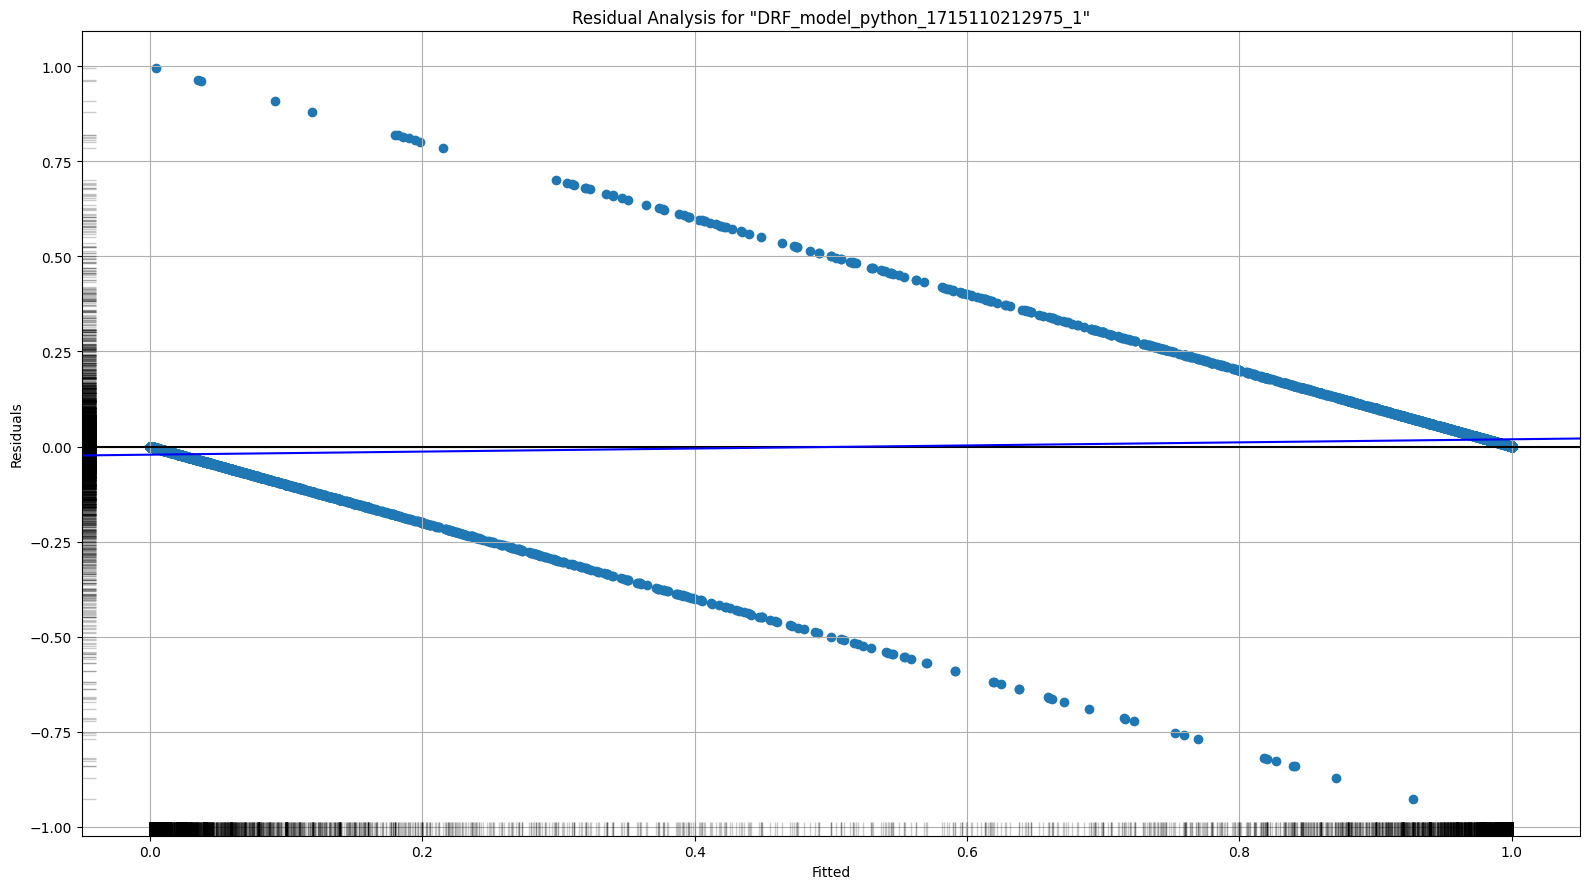

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

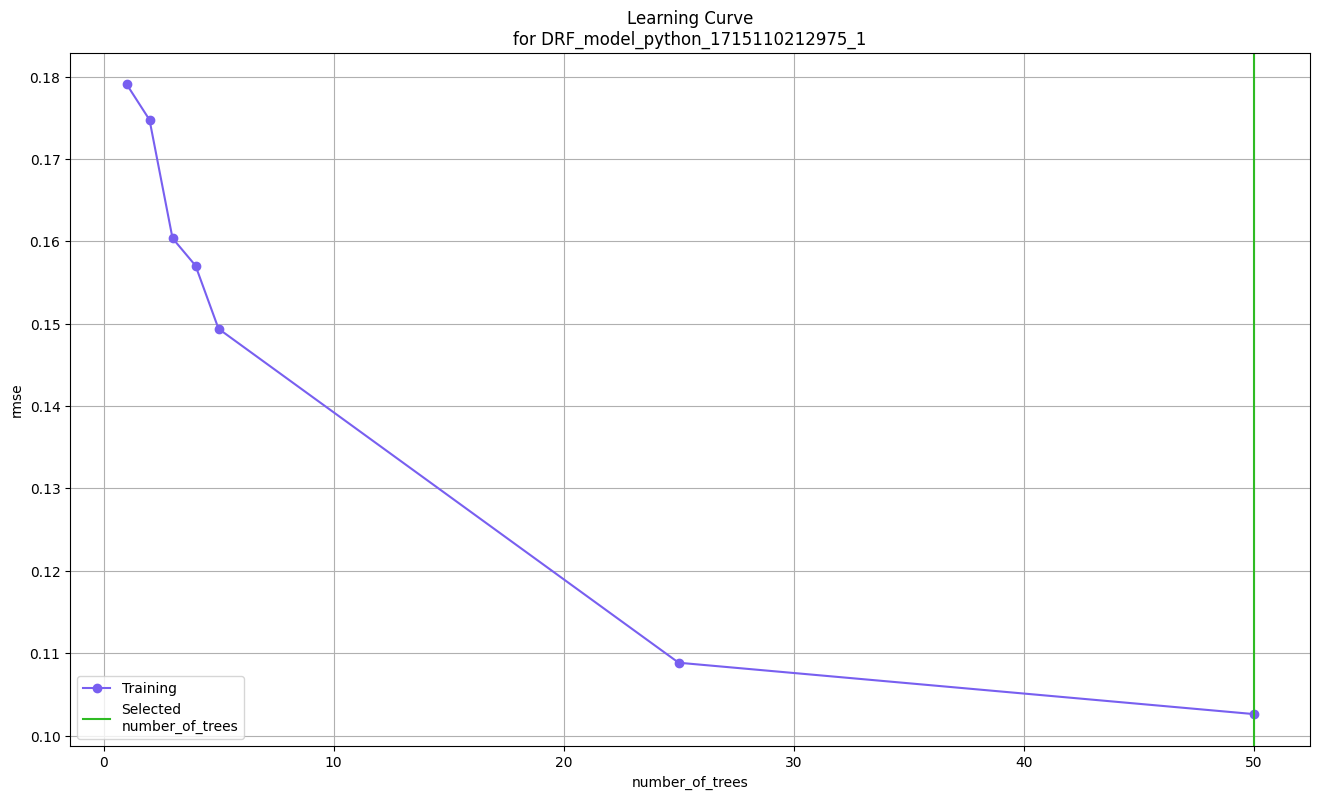

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

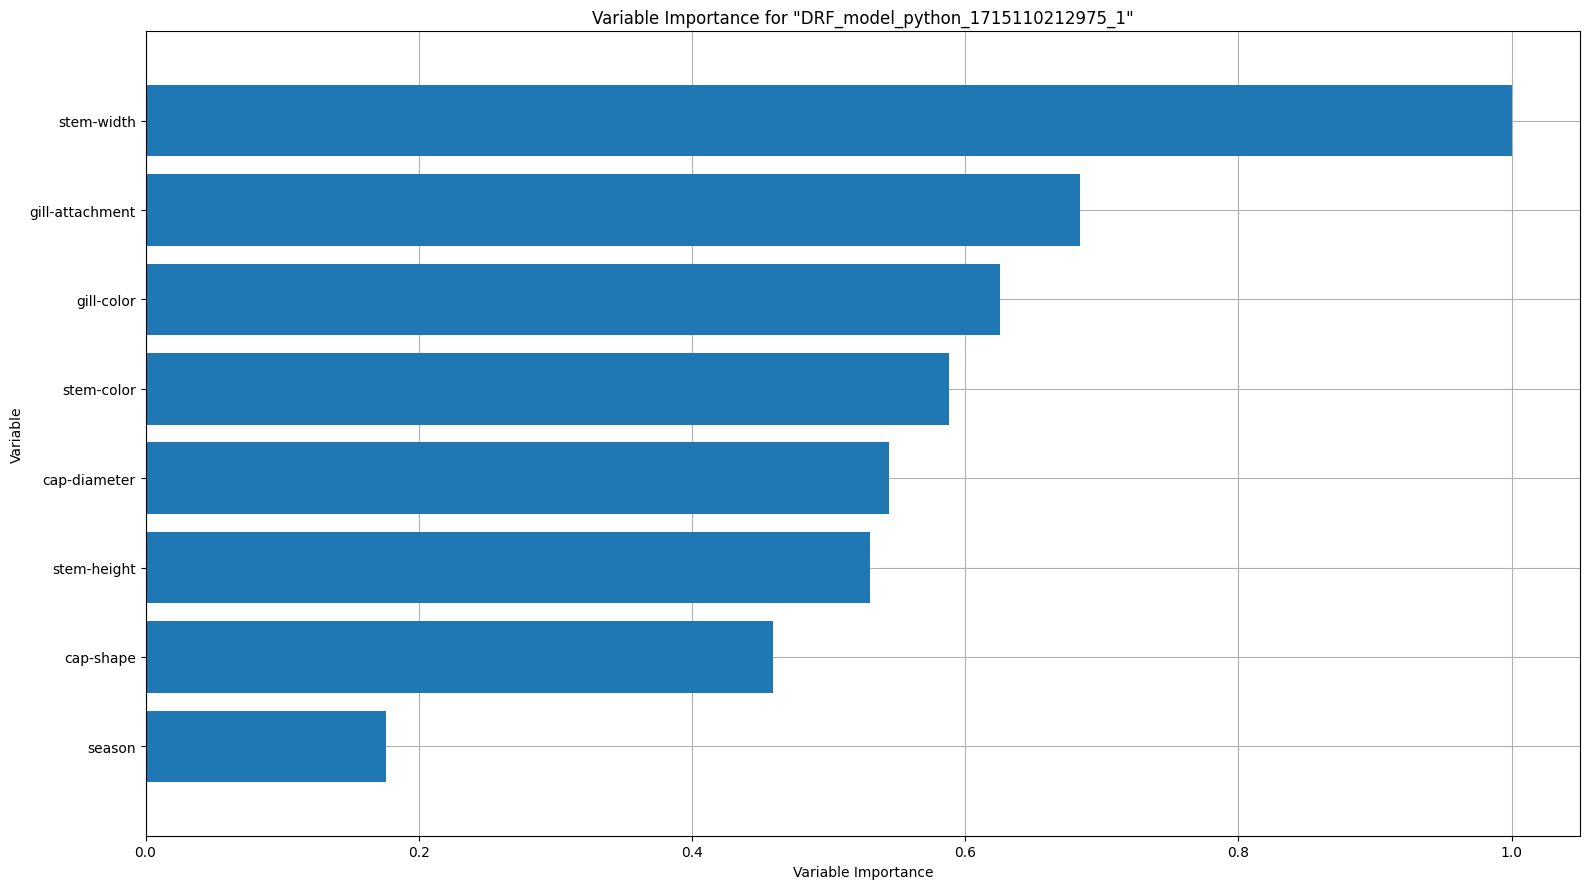

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

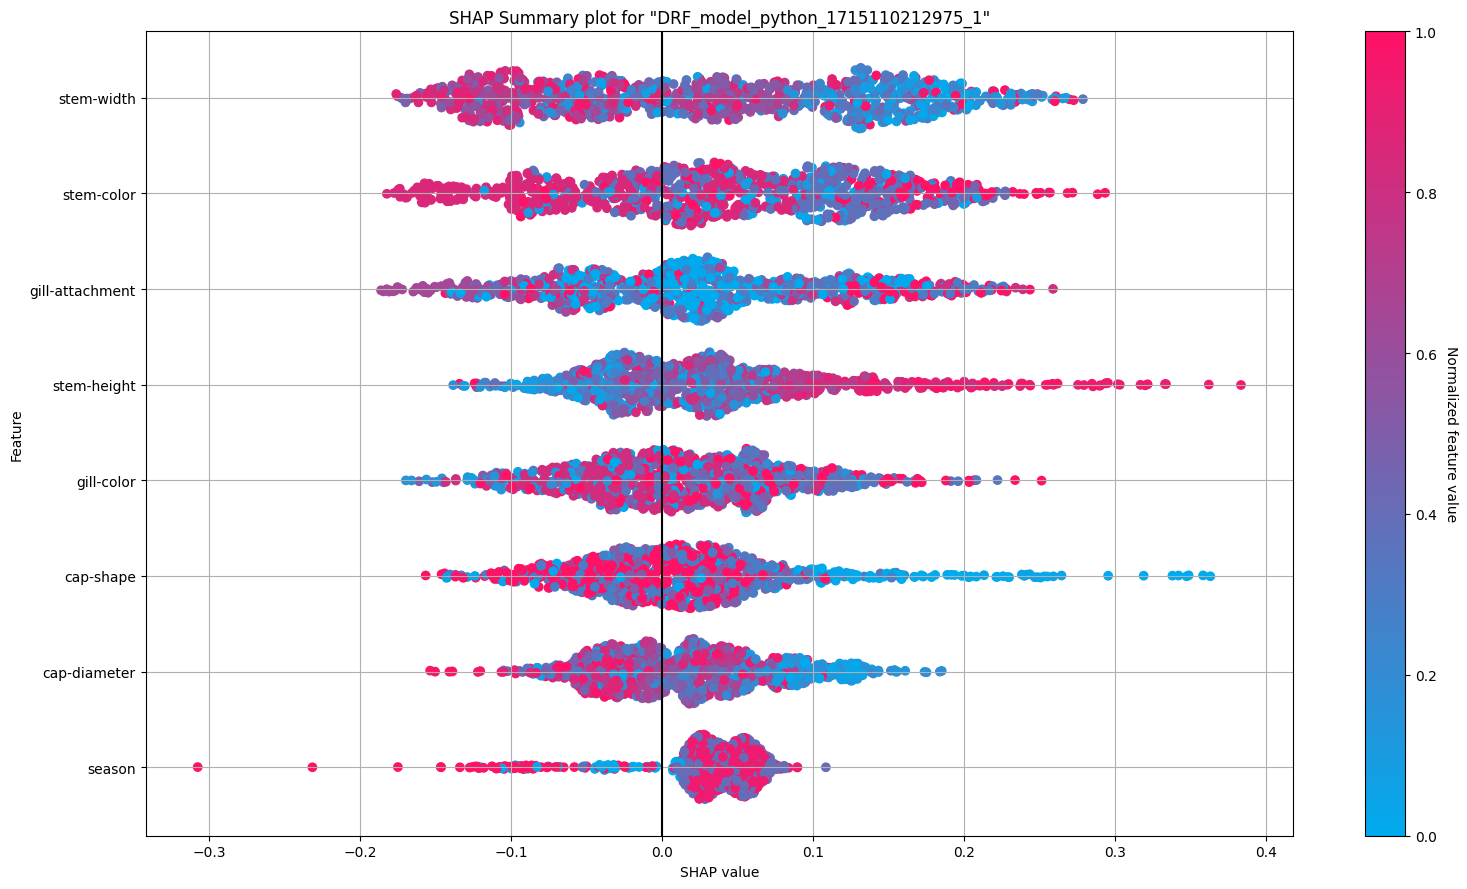

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

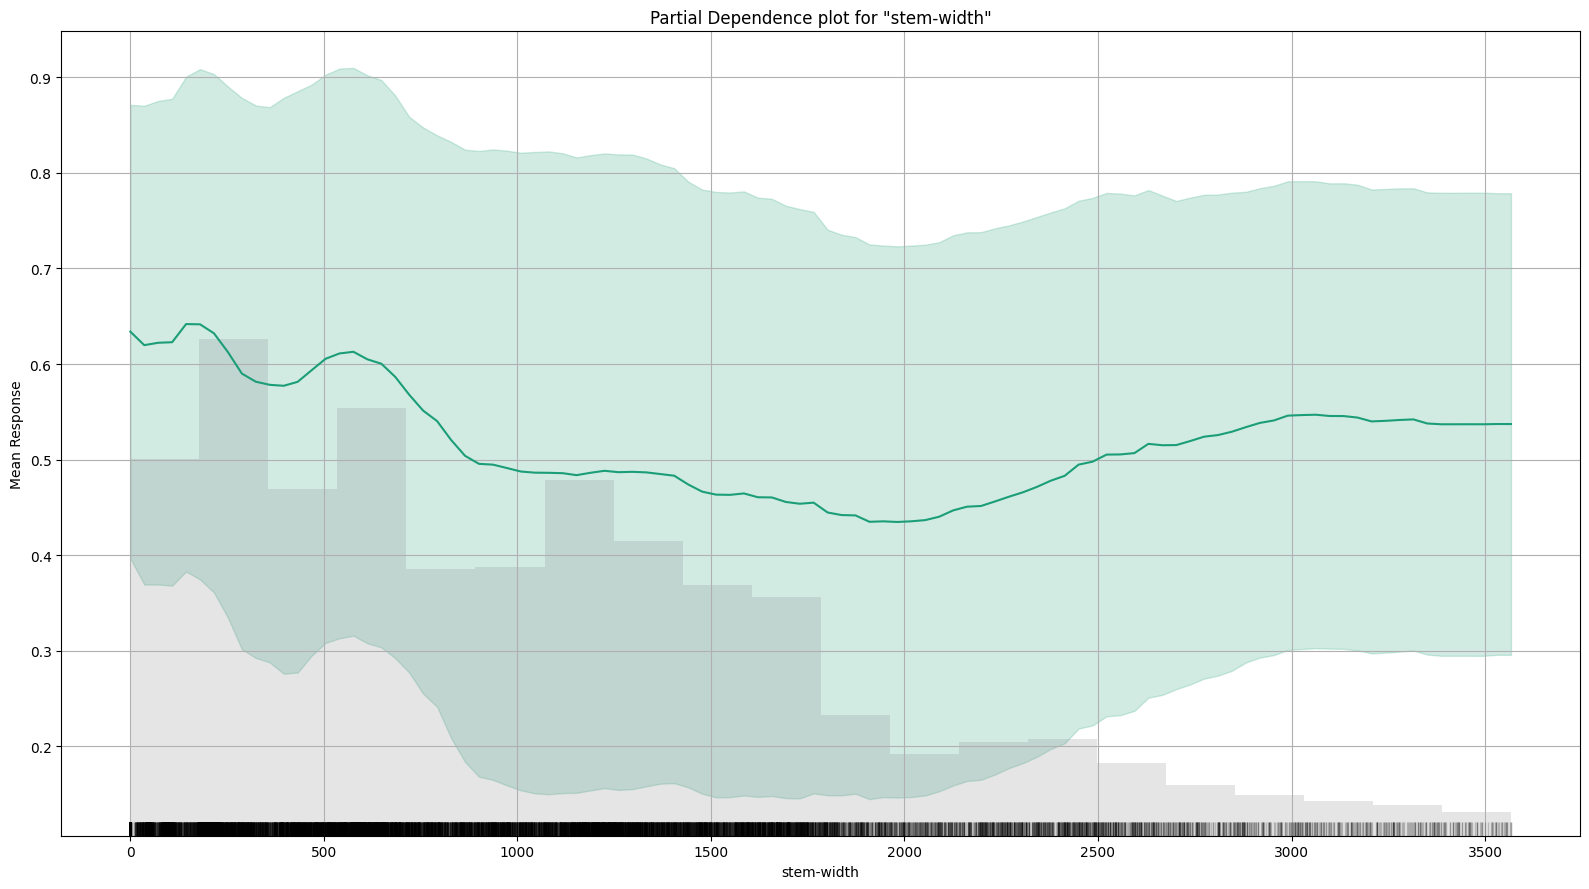

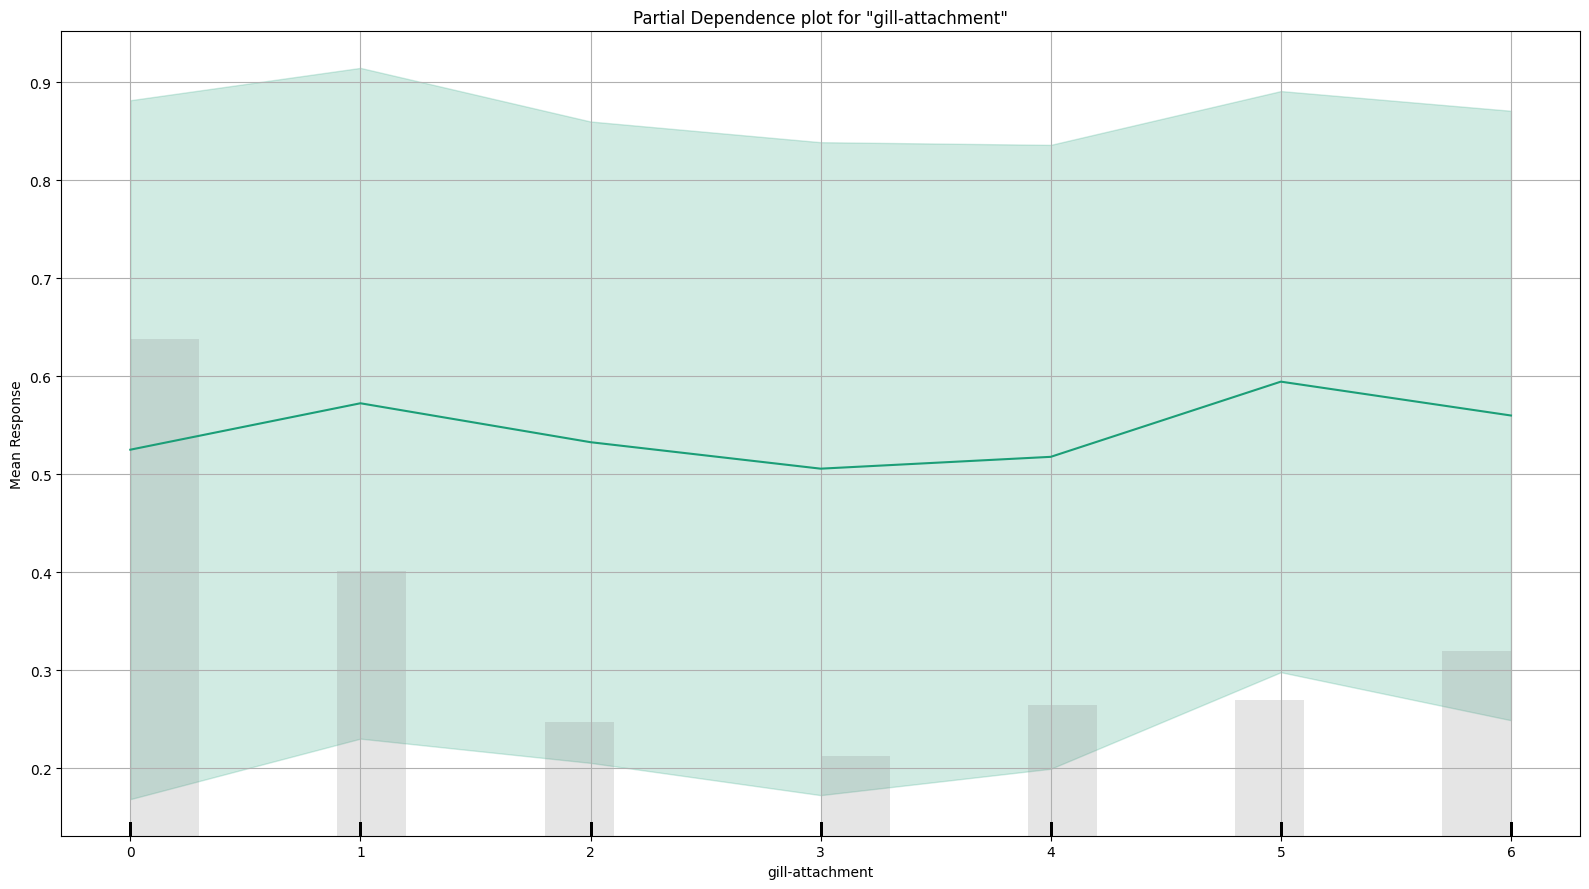

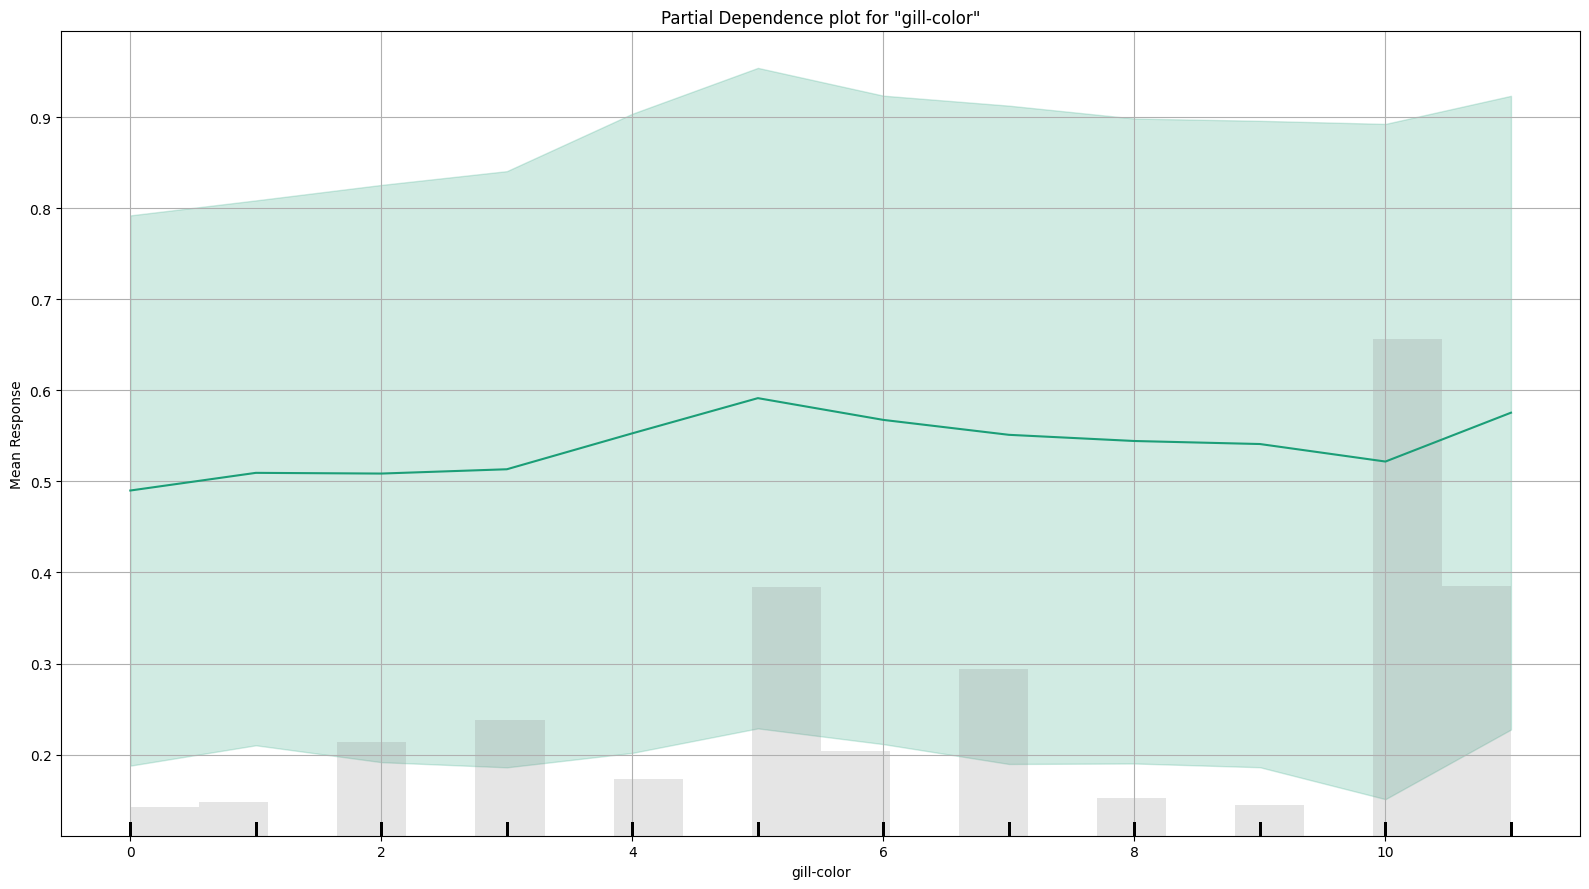

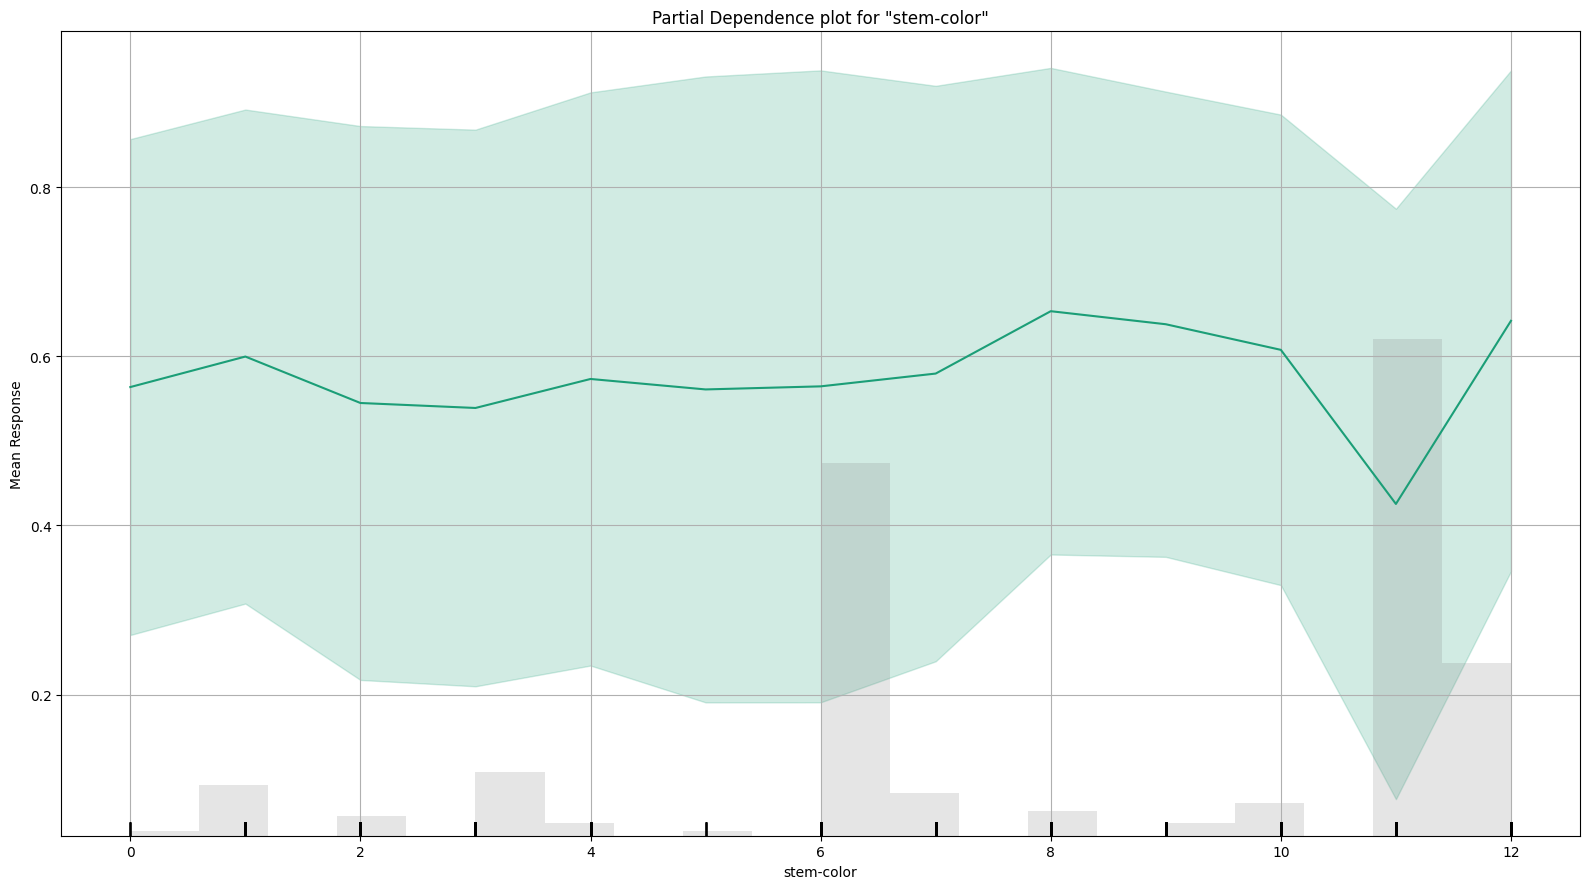

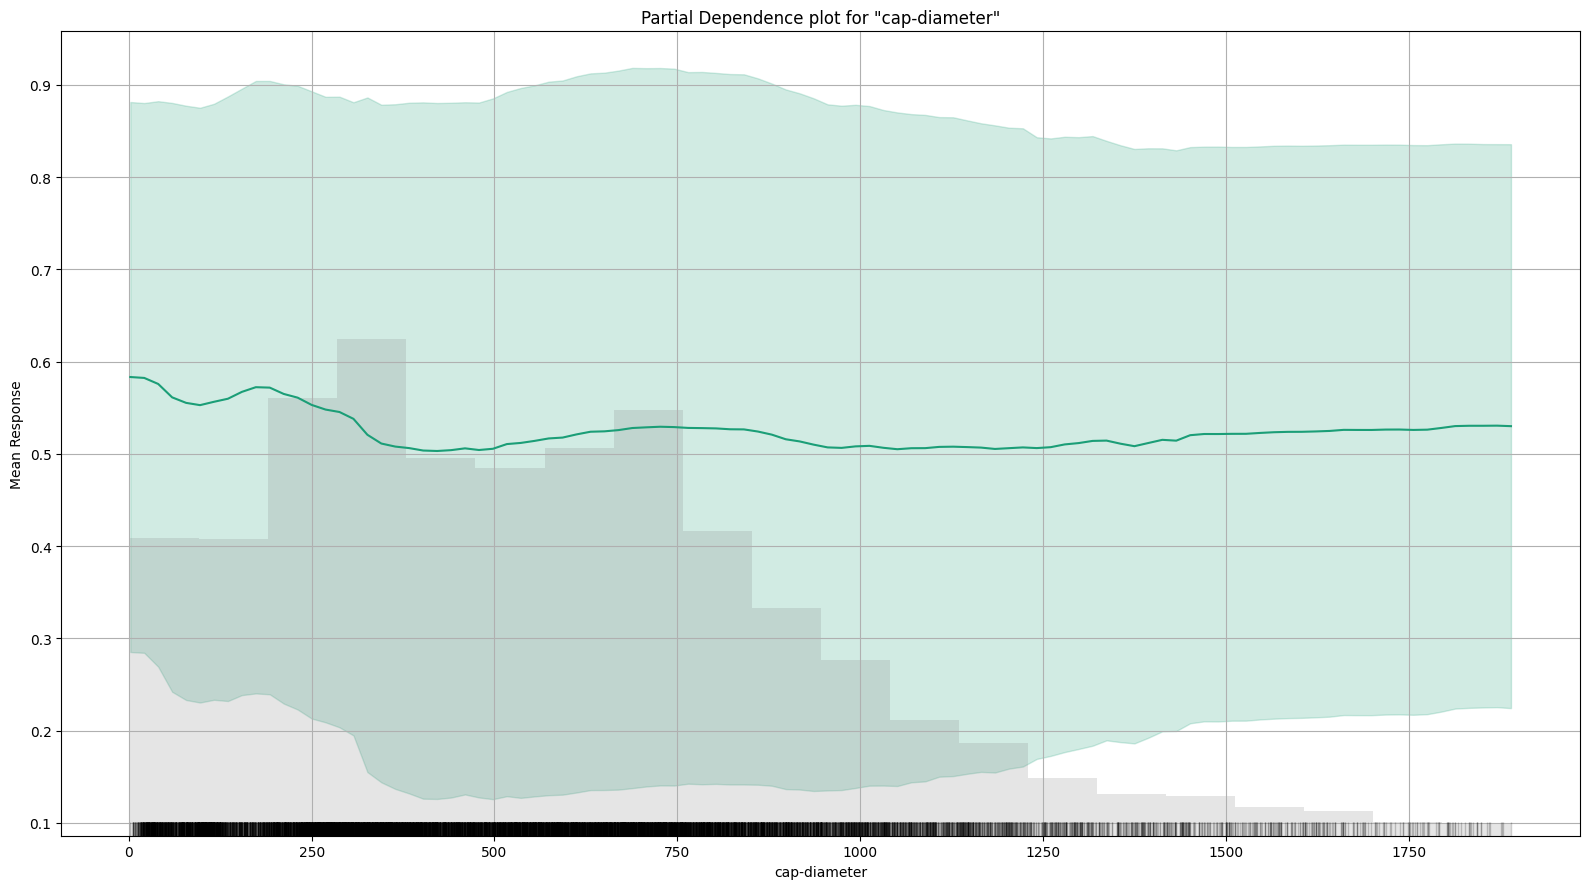

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

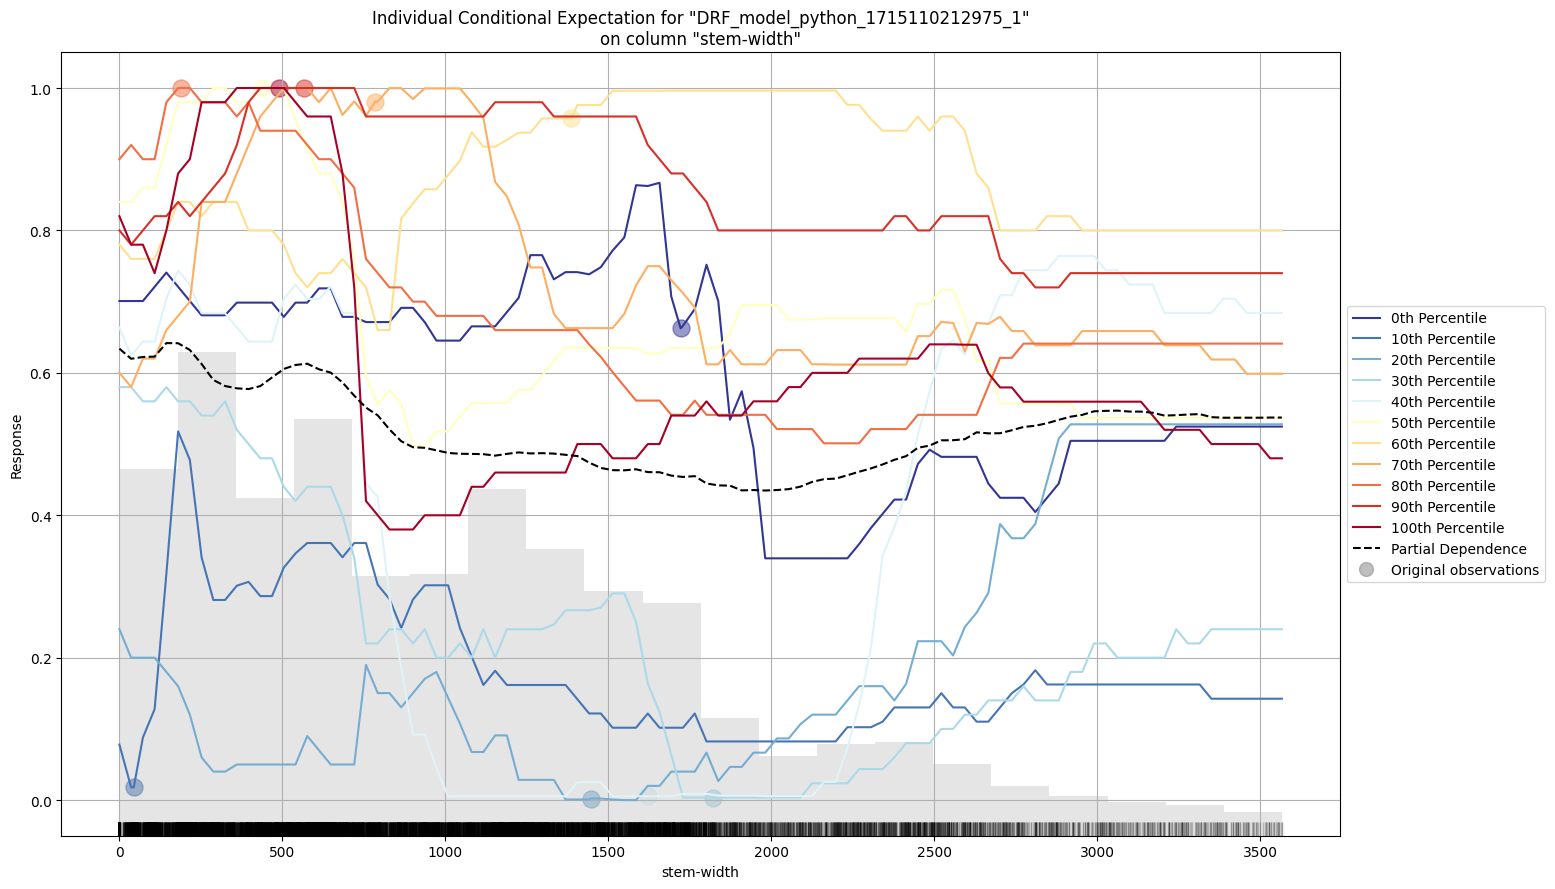

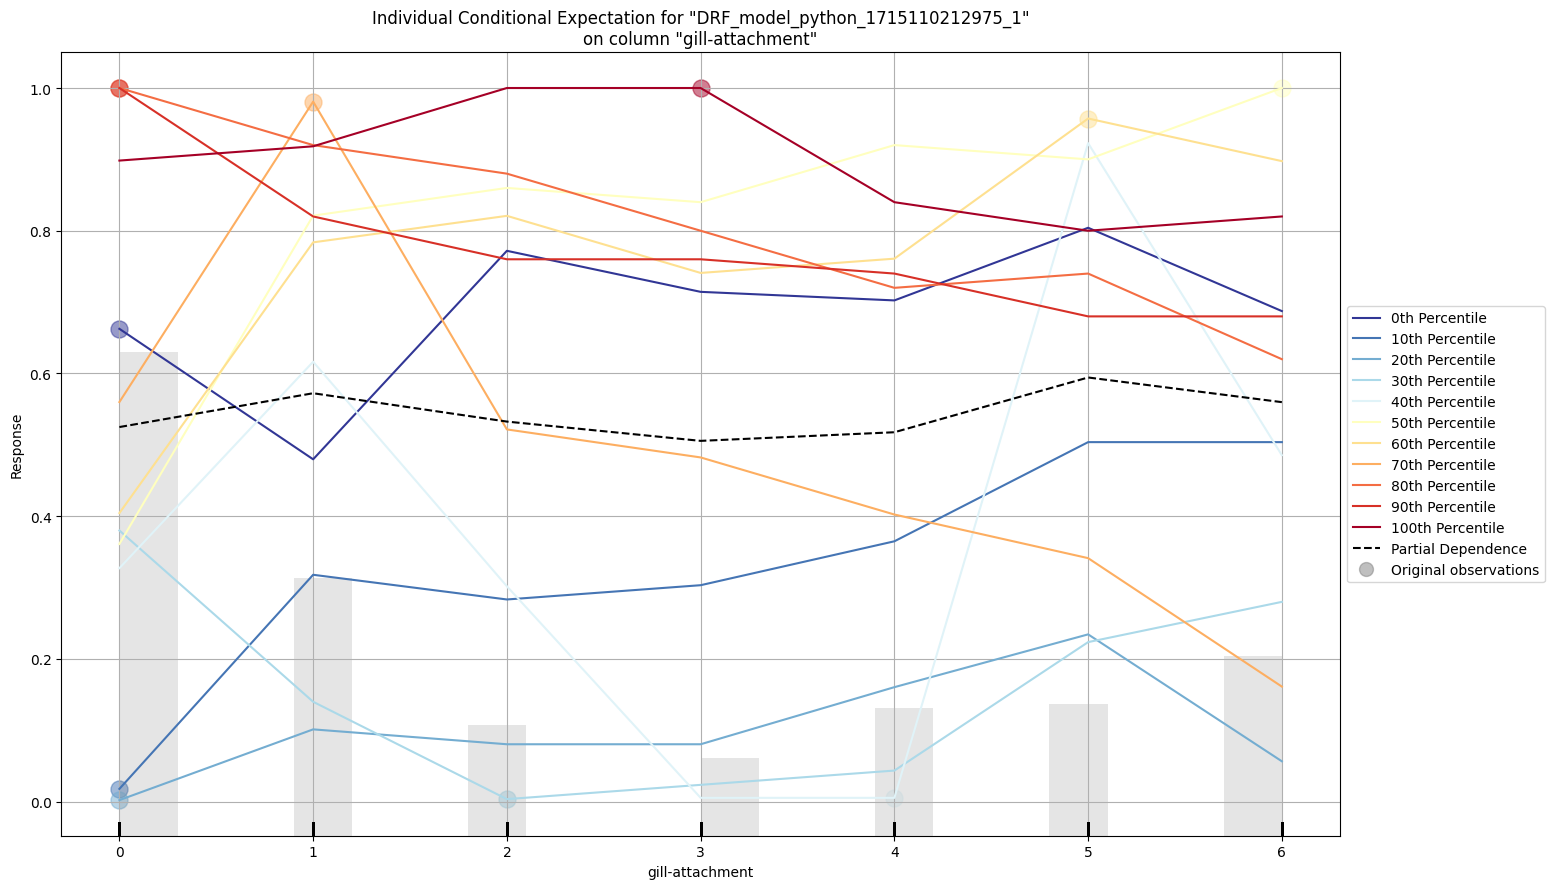

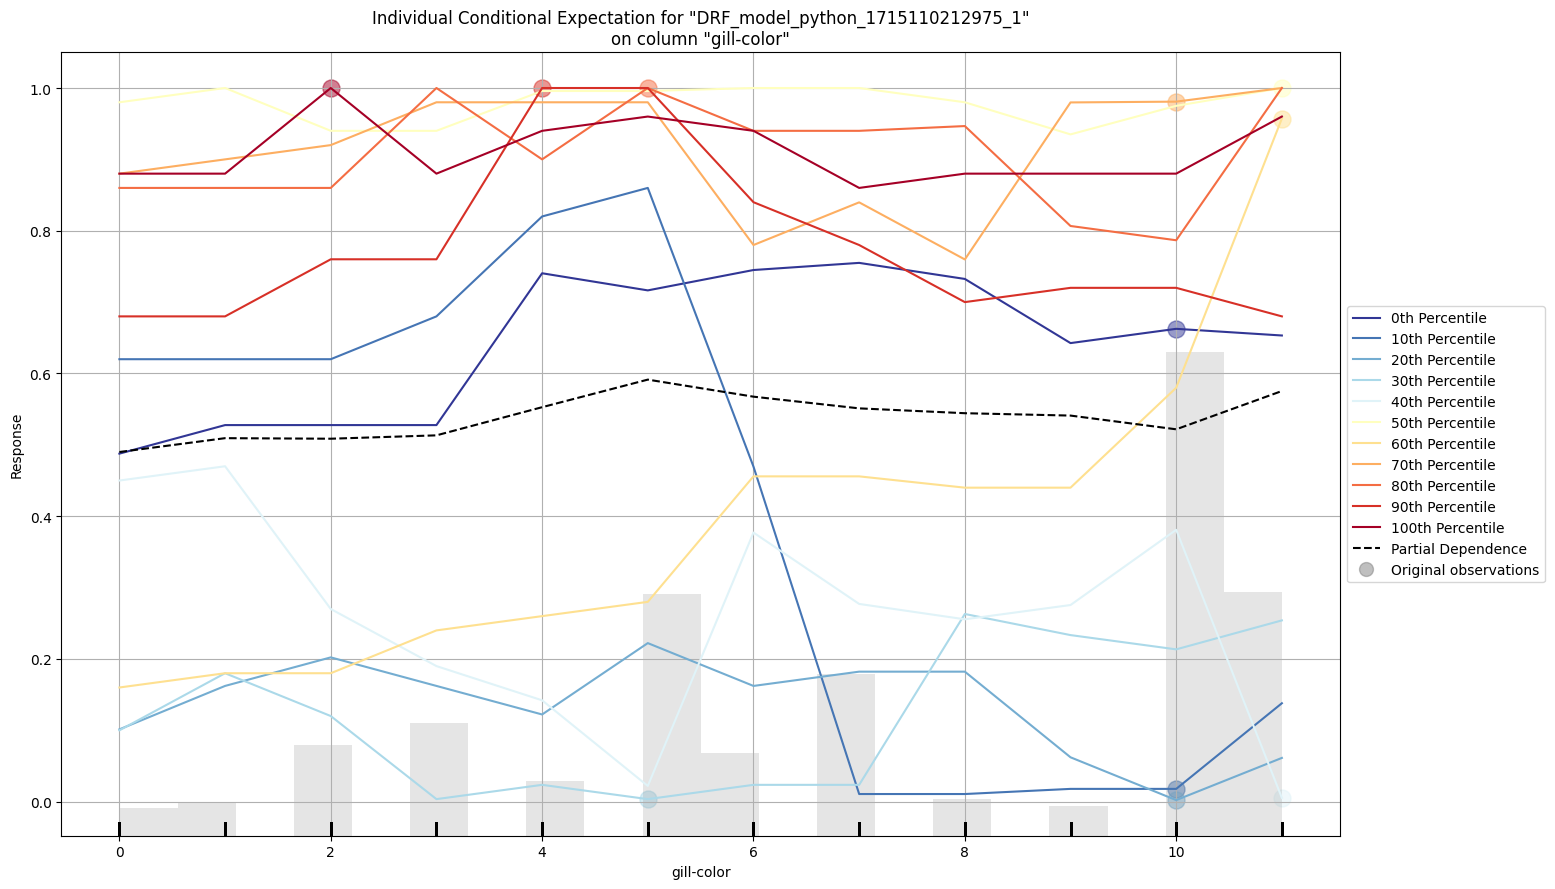

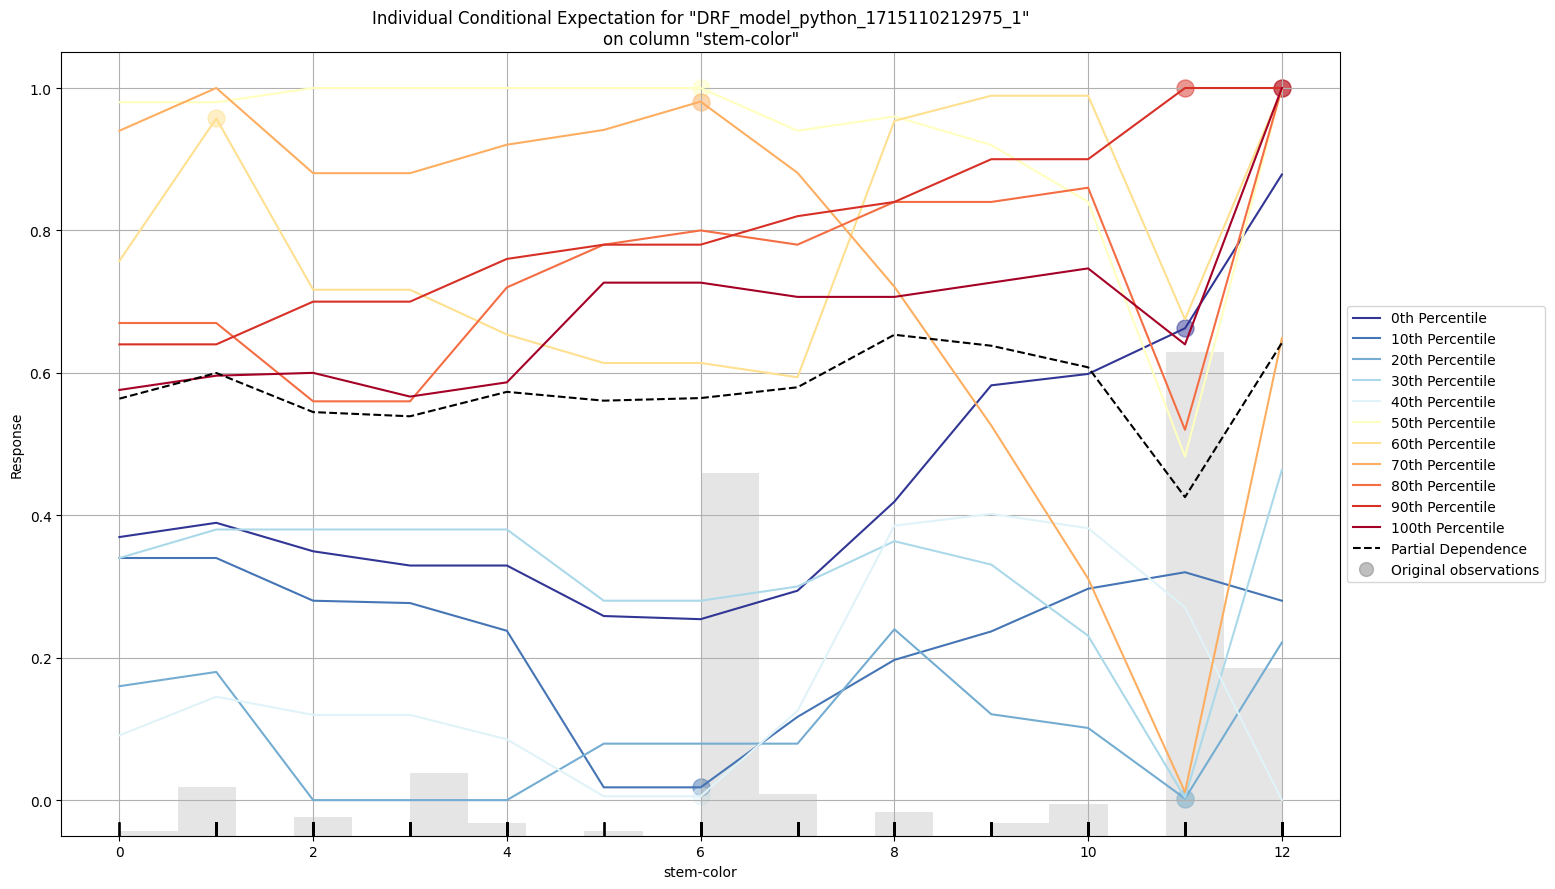

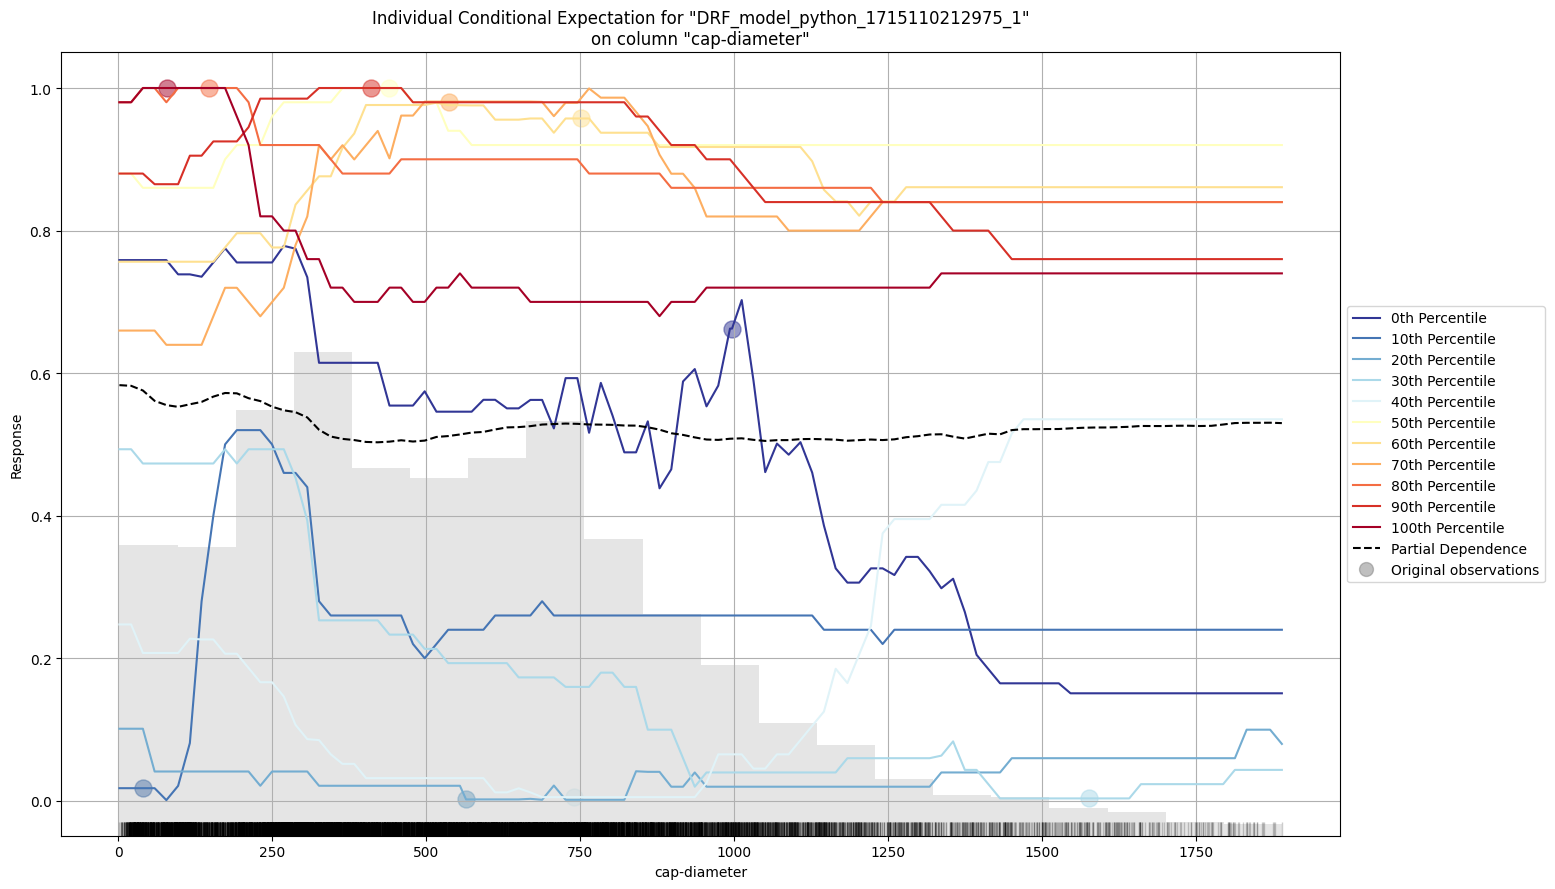



H2O session _sid_9375 closed.


Deprecated, use ``h2o.cluster().shutdown()``.


In [ ]:
import h2o
from h2o.estimators import H2ORandomForestEstimator
import pandas as pd

# Start H2O
h2o.init()

# Print the H2O version
print(f"H2O Version: {h2o.__version__}")

feature_names = df.columns
hf = h2o.H2OFrame(df)

# Specify the features and target, and split the data
feature_cols = hf.columns[:-1]
target_col = hf.columns[-1]
train, test = hf.split_frame(ratios=[0.8], seed=1234)

# Initialize and train the random forest model
model = H2ORandomForestEstimator(ntrees=50, max_depth=20, seed=42)
model.train(x=feature_cols, y=target_col, training_frame=train)

# Explain the model
model.explain(test)

# Shutdown H2O
h2o.shutdown(prompt=False)


## Surrogate Model

Checking whether there is an H2O instance running at http://localhost:54321. connected.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         2 mins 01 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.46.0.1
H2O_cluster_version_age:    1 month and 24 days
H2O_cluster_name:           H2O_from_python_unknownUser_g3isam
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.157 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.10.12 final
--------------------------  -----------------------------------------------------------------------------------------

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()




Surrogate Decision Tree Rules:

|--- stem-width <= 734.50
|   |--- stem-height <= 0.72
|   |   |--- season <= 1.37
|   |   |   |--- class: 1
|   |   |--- season >  1.37
|   |   |   |--- class: 0
|   |--- stem-height >  0.72
|   |   |--- stem-color <= 10.50
|   |   |   |--- class: 1
|   |   |--- stem-color >  10.50
|   |   |   |--- class: 1
|--- stem-width >  734.50
|   |--- stem-height <= 1.17
|   |   |--- stem-width <= 2635.50
|   |   |   |--- class: 0
|   |   |--- stem-width >  2635.50
|   |   |   |--- class: 1
|   |--- stem-height >  1.17
|   |   |--- gill-attachment <= 0.50
|   |   |   |--- class: 1
|   |   |--- gill-attachment >  0.50
|   |   |   |--- class: 0



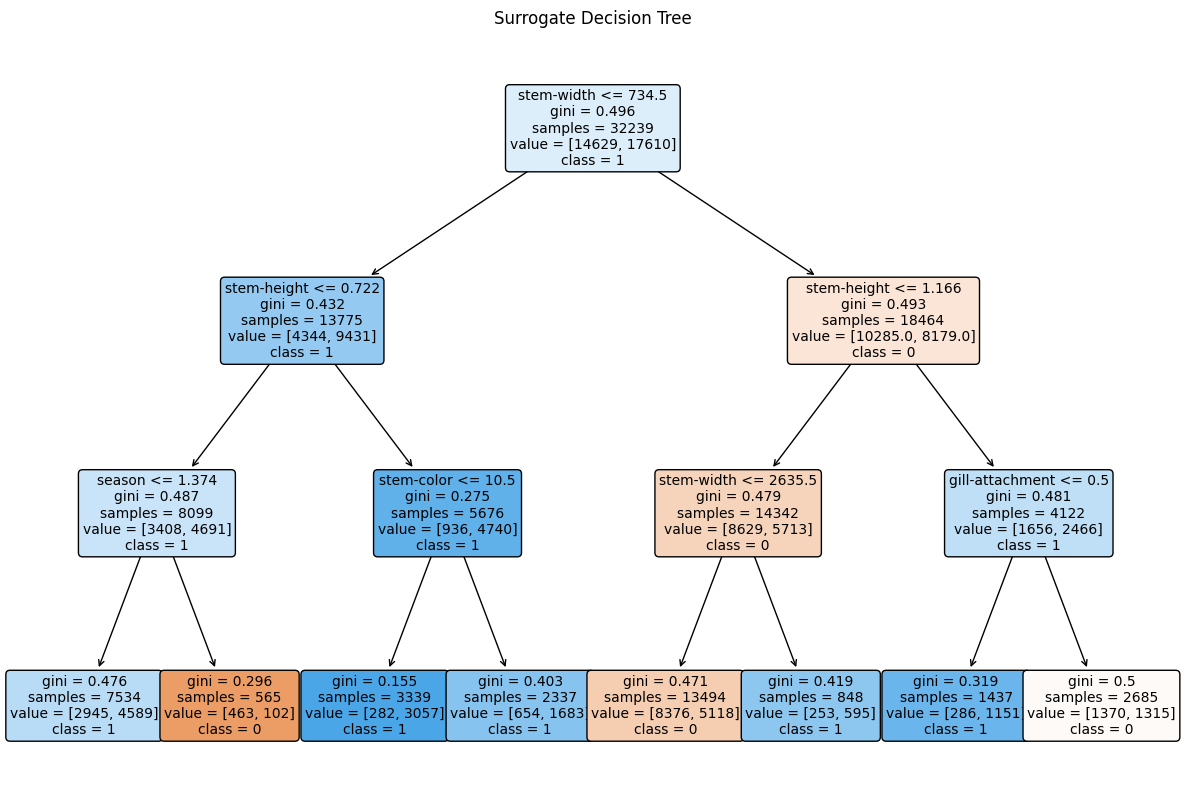

Surrogate Model Training Accuracy: 0.66
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()



Surrogate Model Test Accuracy: 0.66
H2O session _sid_8dd5 closed.


Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

Deprecated, use ``h2o.cluster().shutdown()``.


In [ ]:
import h2o
from h2o.estimators import H2ORandomForestEstimator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Initialize H2O
h2o.init()

# Separate features and target
X_train = train_df.drop('class', axis=1)
y_train = train_df['class']
X_test = test_df.drop('class', axis=1)
y_test = test_df['class']

# Encode the target variable
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# Convert to H2O frames
train_h2o = pd.DataFrame(X_train)
train_h2o['class'] = y_train

test_h2o = pd.DataFrame(X_test)
test_h2o['class'] = y_test

train_h2o = h2o.H2OFrame(train_h2o)
test_h2o = h2o.H2OFrame(test_h2o)

# Convert target to categorical
train_h2o['class'] = train_h2o['class'].asfactor()
test_h2o['class'] = test_h2o['class'].asfactor()

# Identify feature columns and the target column
features = train_h2o.columns[:-1]
target = 'class'

# Train the original complex model (Random Forest)
complex_model = H2ORandomForestEstimator(ntrees=100, max_depth=20, seed=42)
complex_model.train(x=features, y=target, training_frame=train_h2o)

# Generate predictions on the training set
train_preds = complex_model.predict(train_h2o)
train_h2o['complex_preds'] = train_preds['predict']

# Exclude "class" from the feature set when training the surrogate model
train_h2o_features = train_h2o.drop(['class', 'complex_preds'])
X_train_surrogate = train_h2o_features.as_data_frame()
y_train_surrogate = train_h2o['complex_preds'].as_data_frame().values.flatten()

# Train a surrogate Decision Tree using predictions of the RandomForest model as targets
surrogate_model = DecisionTreeClassifier(max_depth=3, random_state=42)
surrogate_model.fit(X_train_surrogate, y_train_surrogate)

# Print the surrogate Decision Tree structure
tree_rules = export_text(surrogate_model, feature_names=list(X_train_surrogate.columns))
print("\nSurrogate Decision Tree Rules:\n")
print(tree_rules)

# Plot the surrogate decision tree
plt.figure(figsize=(15, 10))
plot_tree(
    surrogate_model,
    feature_names=list(X_train_surrogate.columns),
    class_names=[str(cls) for cls in le.classes_],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Surrogate Decision Tree")
plt.show()

# Evaluate the surrogate model on the training set
train_preds_surrogate = surrogate_model.predict(X_train_surrogate)
train_accuracy = (train_preds_surrogate == y_train_surrogate).mean()
print(f"Surrogate Model Training Accuracy: {train_accuracy:.2f}")

# Generate predictions on the test set using the RandomForest model
test_preds = complex_model.predict(test_h2o)
test_h2o['complex_preds'] = test_preds['predict']

# Exclude "class" from the test feature set when evaluating the surrogate model
test_h2o_features = test_h2o.drop(['class', 'complex_preds'])
X_test_surrogate = test_h2o_features.as_data_frame()
y_test_surrogate = test_h2o['complex_preds'].as_data_frame().values.flatten()

# Evaluate the surrogate model on the test set
test_preds_surrogate = surrogate_model.predict(X_test_surrogate)
test_accuracy = (test_preds_surrogate == y_test_surrogate).mean()
print(f"Surrogate Model Test Accuracy: {test_accuracy:.2f}")

# Shutdown H2O
h2o.shutdown(prompt=False)
